In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 1000
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, classification_report

In [2]:
xls = pd.ExcelFile(r"F:\Krishna\Excel R\Data Scientist\Assignments\Random Forest\glass.xlsx")
df1 = pd.read_excel(xls, 'Description')
df = pd.read_excel(xls, 'glass')

In [3]:
df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [4]:
df.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [5]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

No missing values and all the datatypes are correct.

Removing Duplicates

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

In [10]:
df.duplicated().sum()

1

In [12]:
df.shape

(214, 10)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(213, 10)

In [15]:
df.duplicated().sum()

0

Visualization

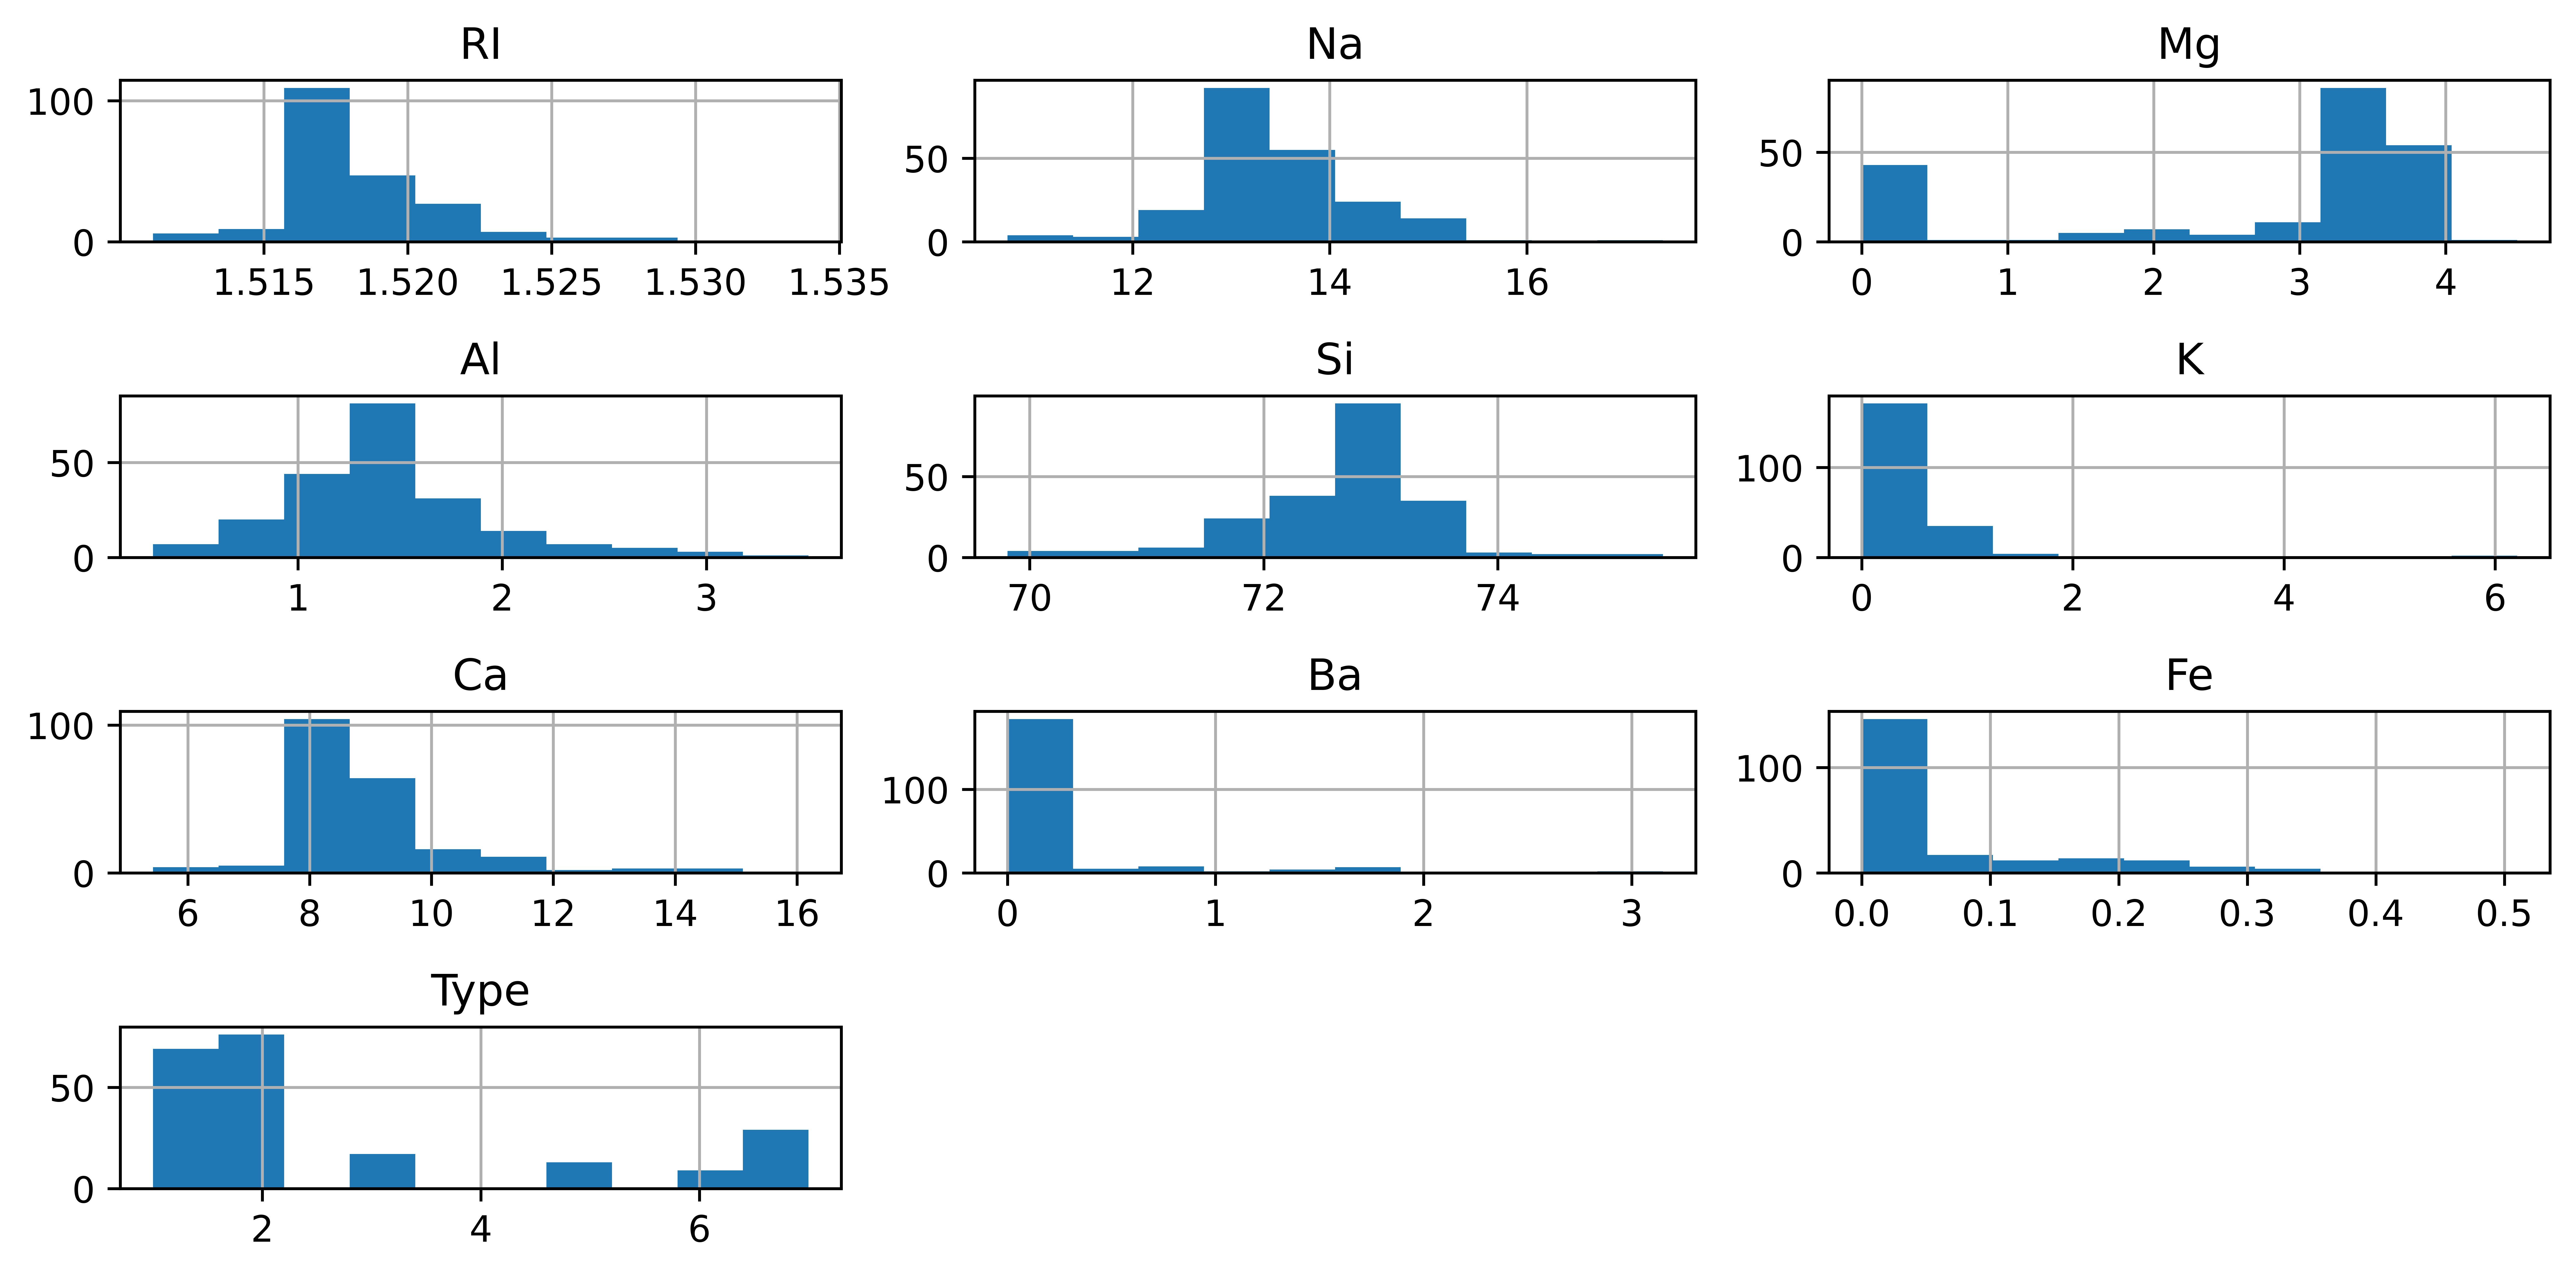

In [16]:
df.hist()
plt.tight_layout()

<Axes: >

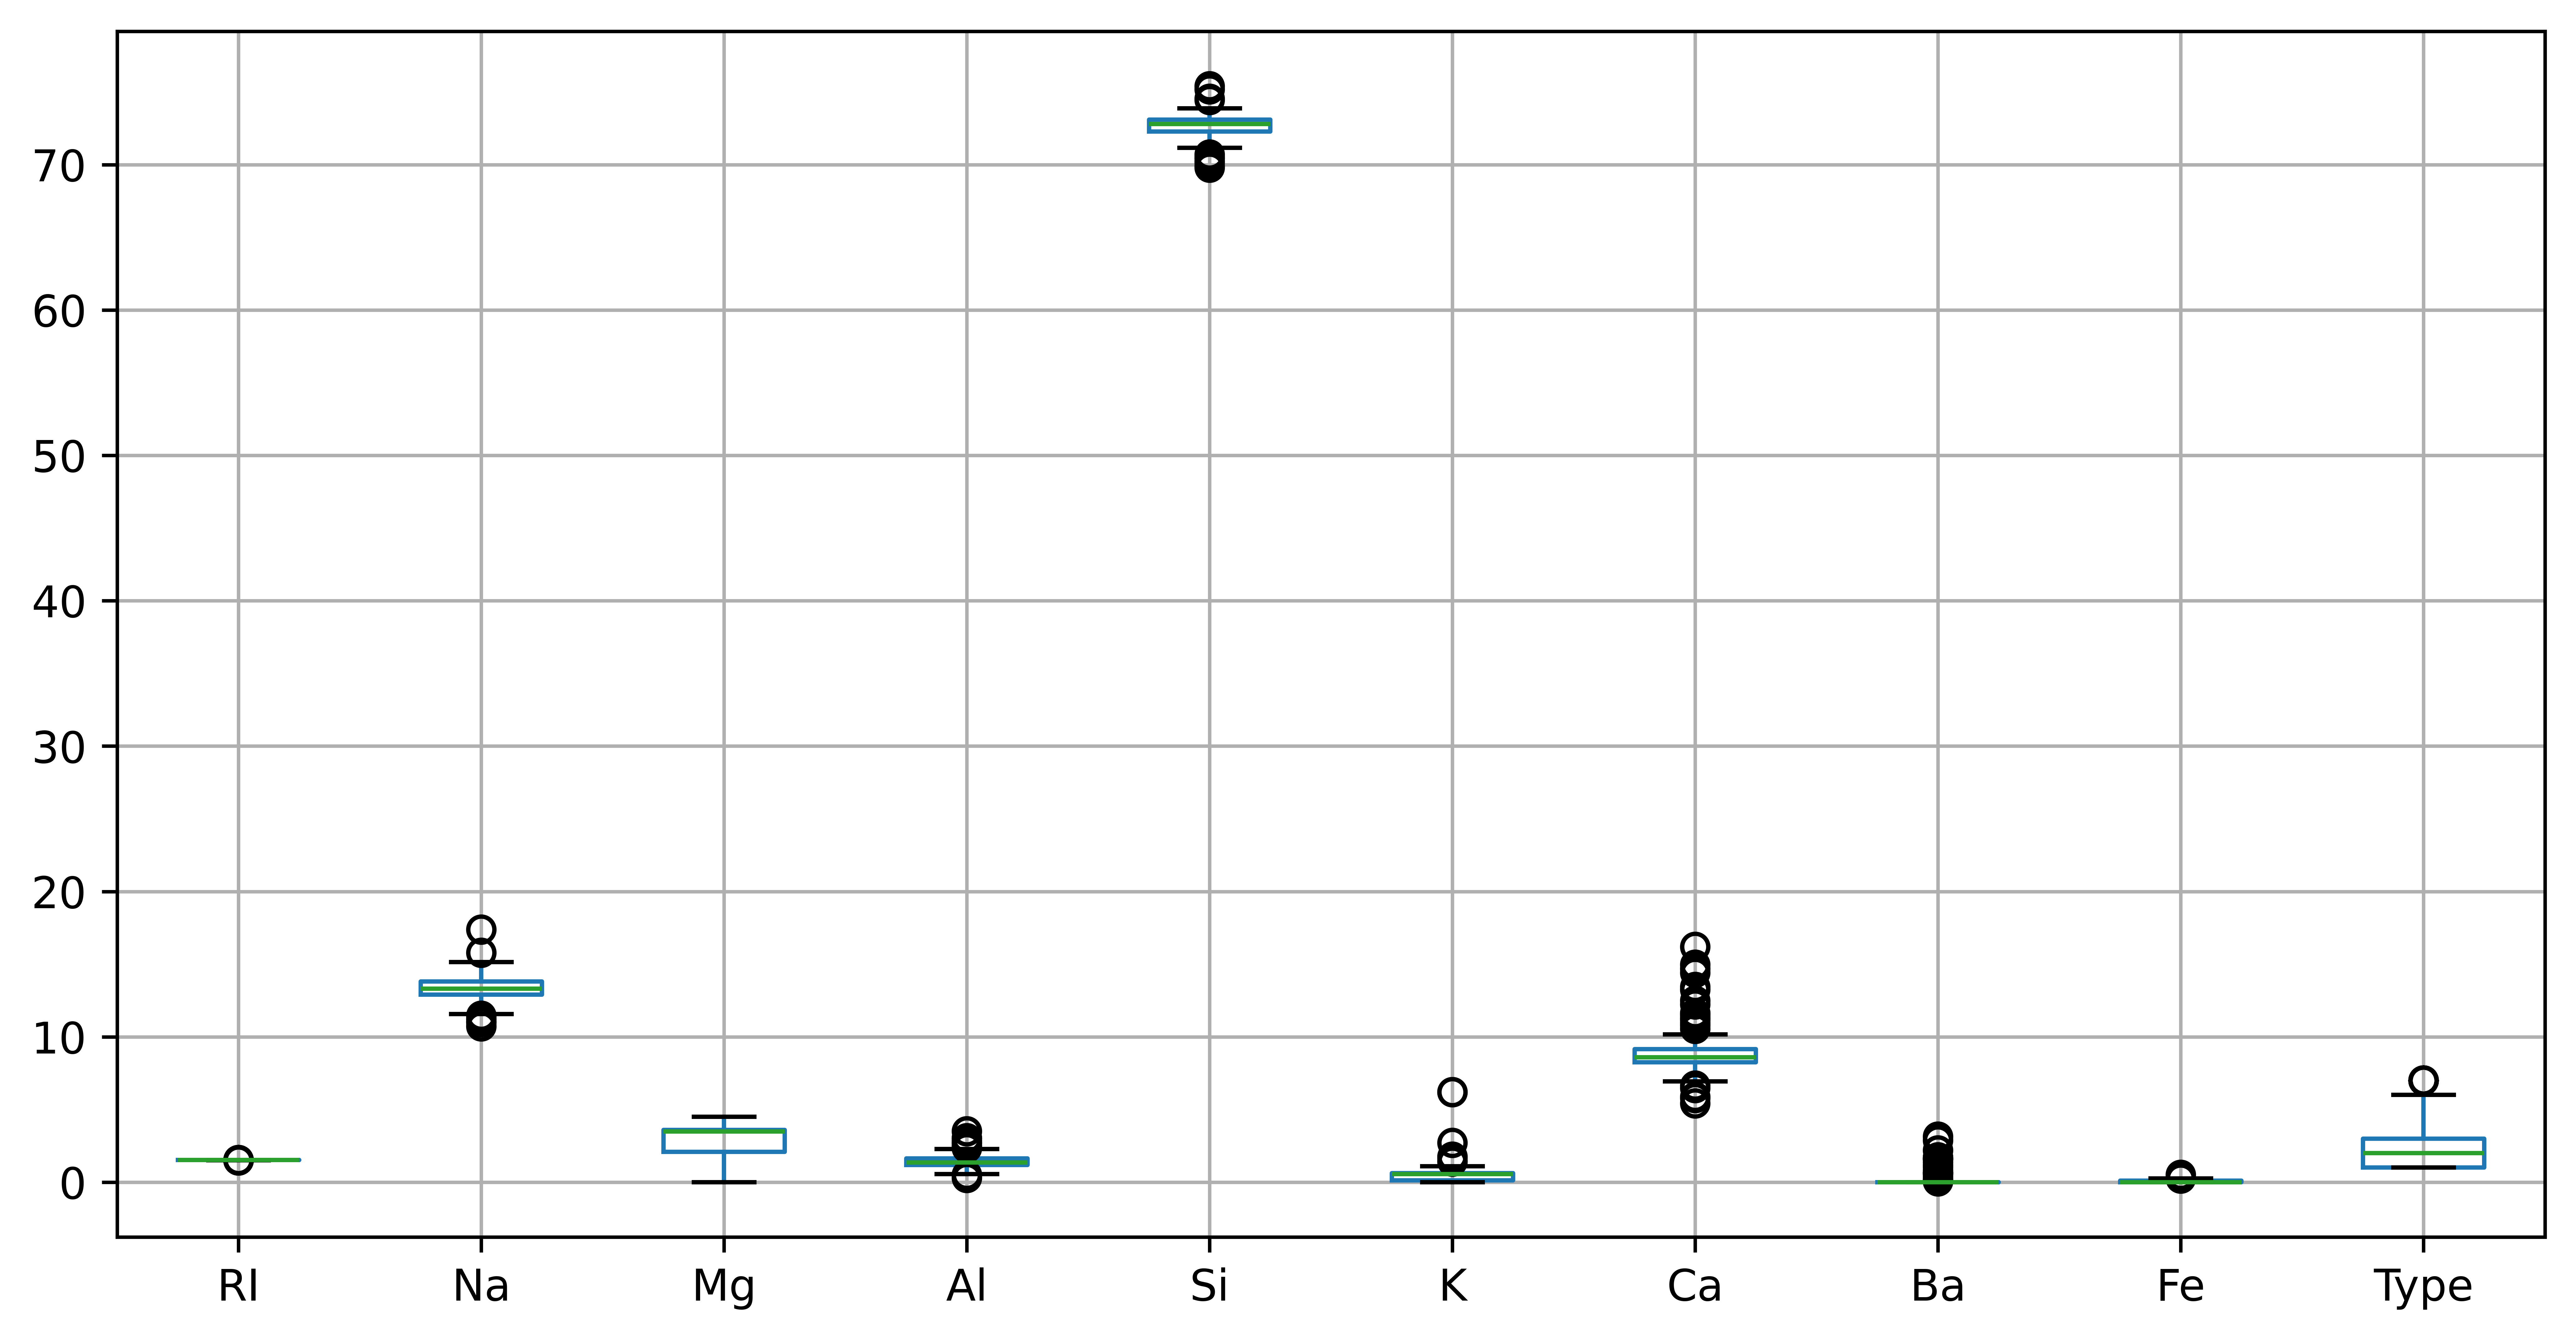

In [18]:
df.boxplot()

In [19]:
def outlier_detection(data, columns):
    
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [20]:
outlier_detection(df,df.columns)

<Axes: >

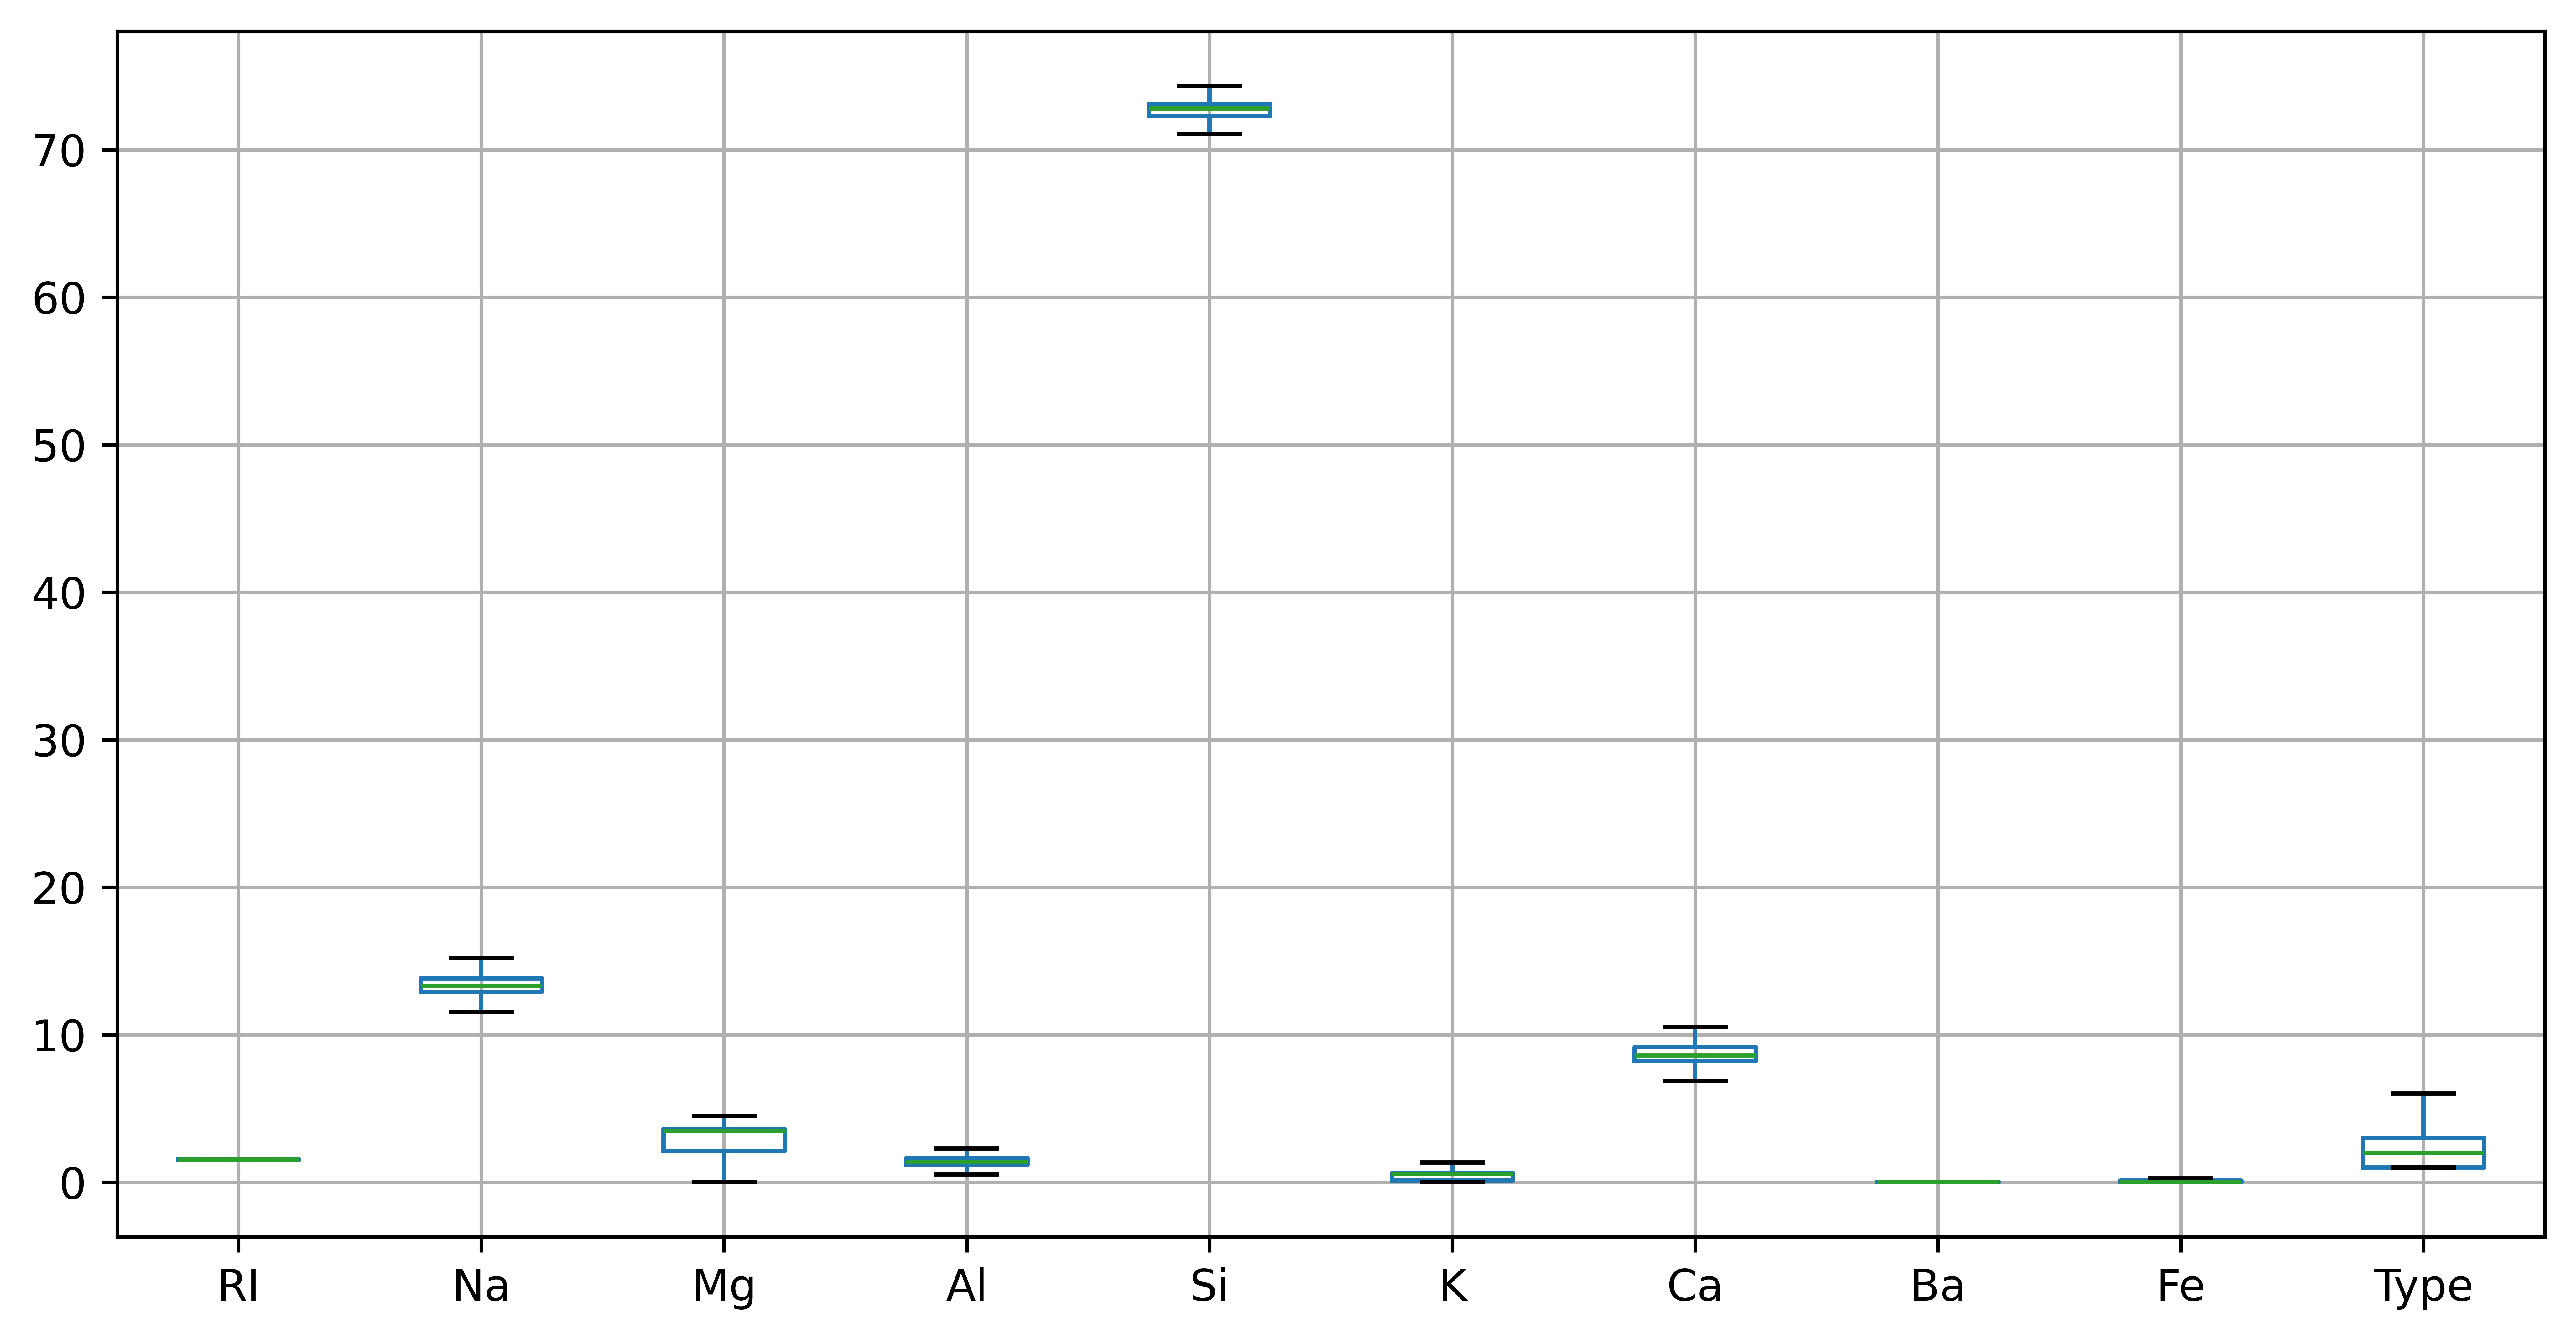

In [21]:
df.boxplot()

Have used capping approach for all the outliers

Scatter Plot and Correlation

In [27]:
df

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1.0
..       ...    ...   ...   ...    ...   ...   ...  ...  ...   ...
209  1.51623  14.14  0.00  2.29  72.61  0.08  9.18  0.0  0.0   6.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  0.0  0.0   6.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  0.0  0.0   6.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  0.0  0.0   6.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  0.0  0.0   6.0

[213 rows x 10 columns]

<Axes: xlabel='RI', ylabel='Mg'>

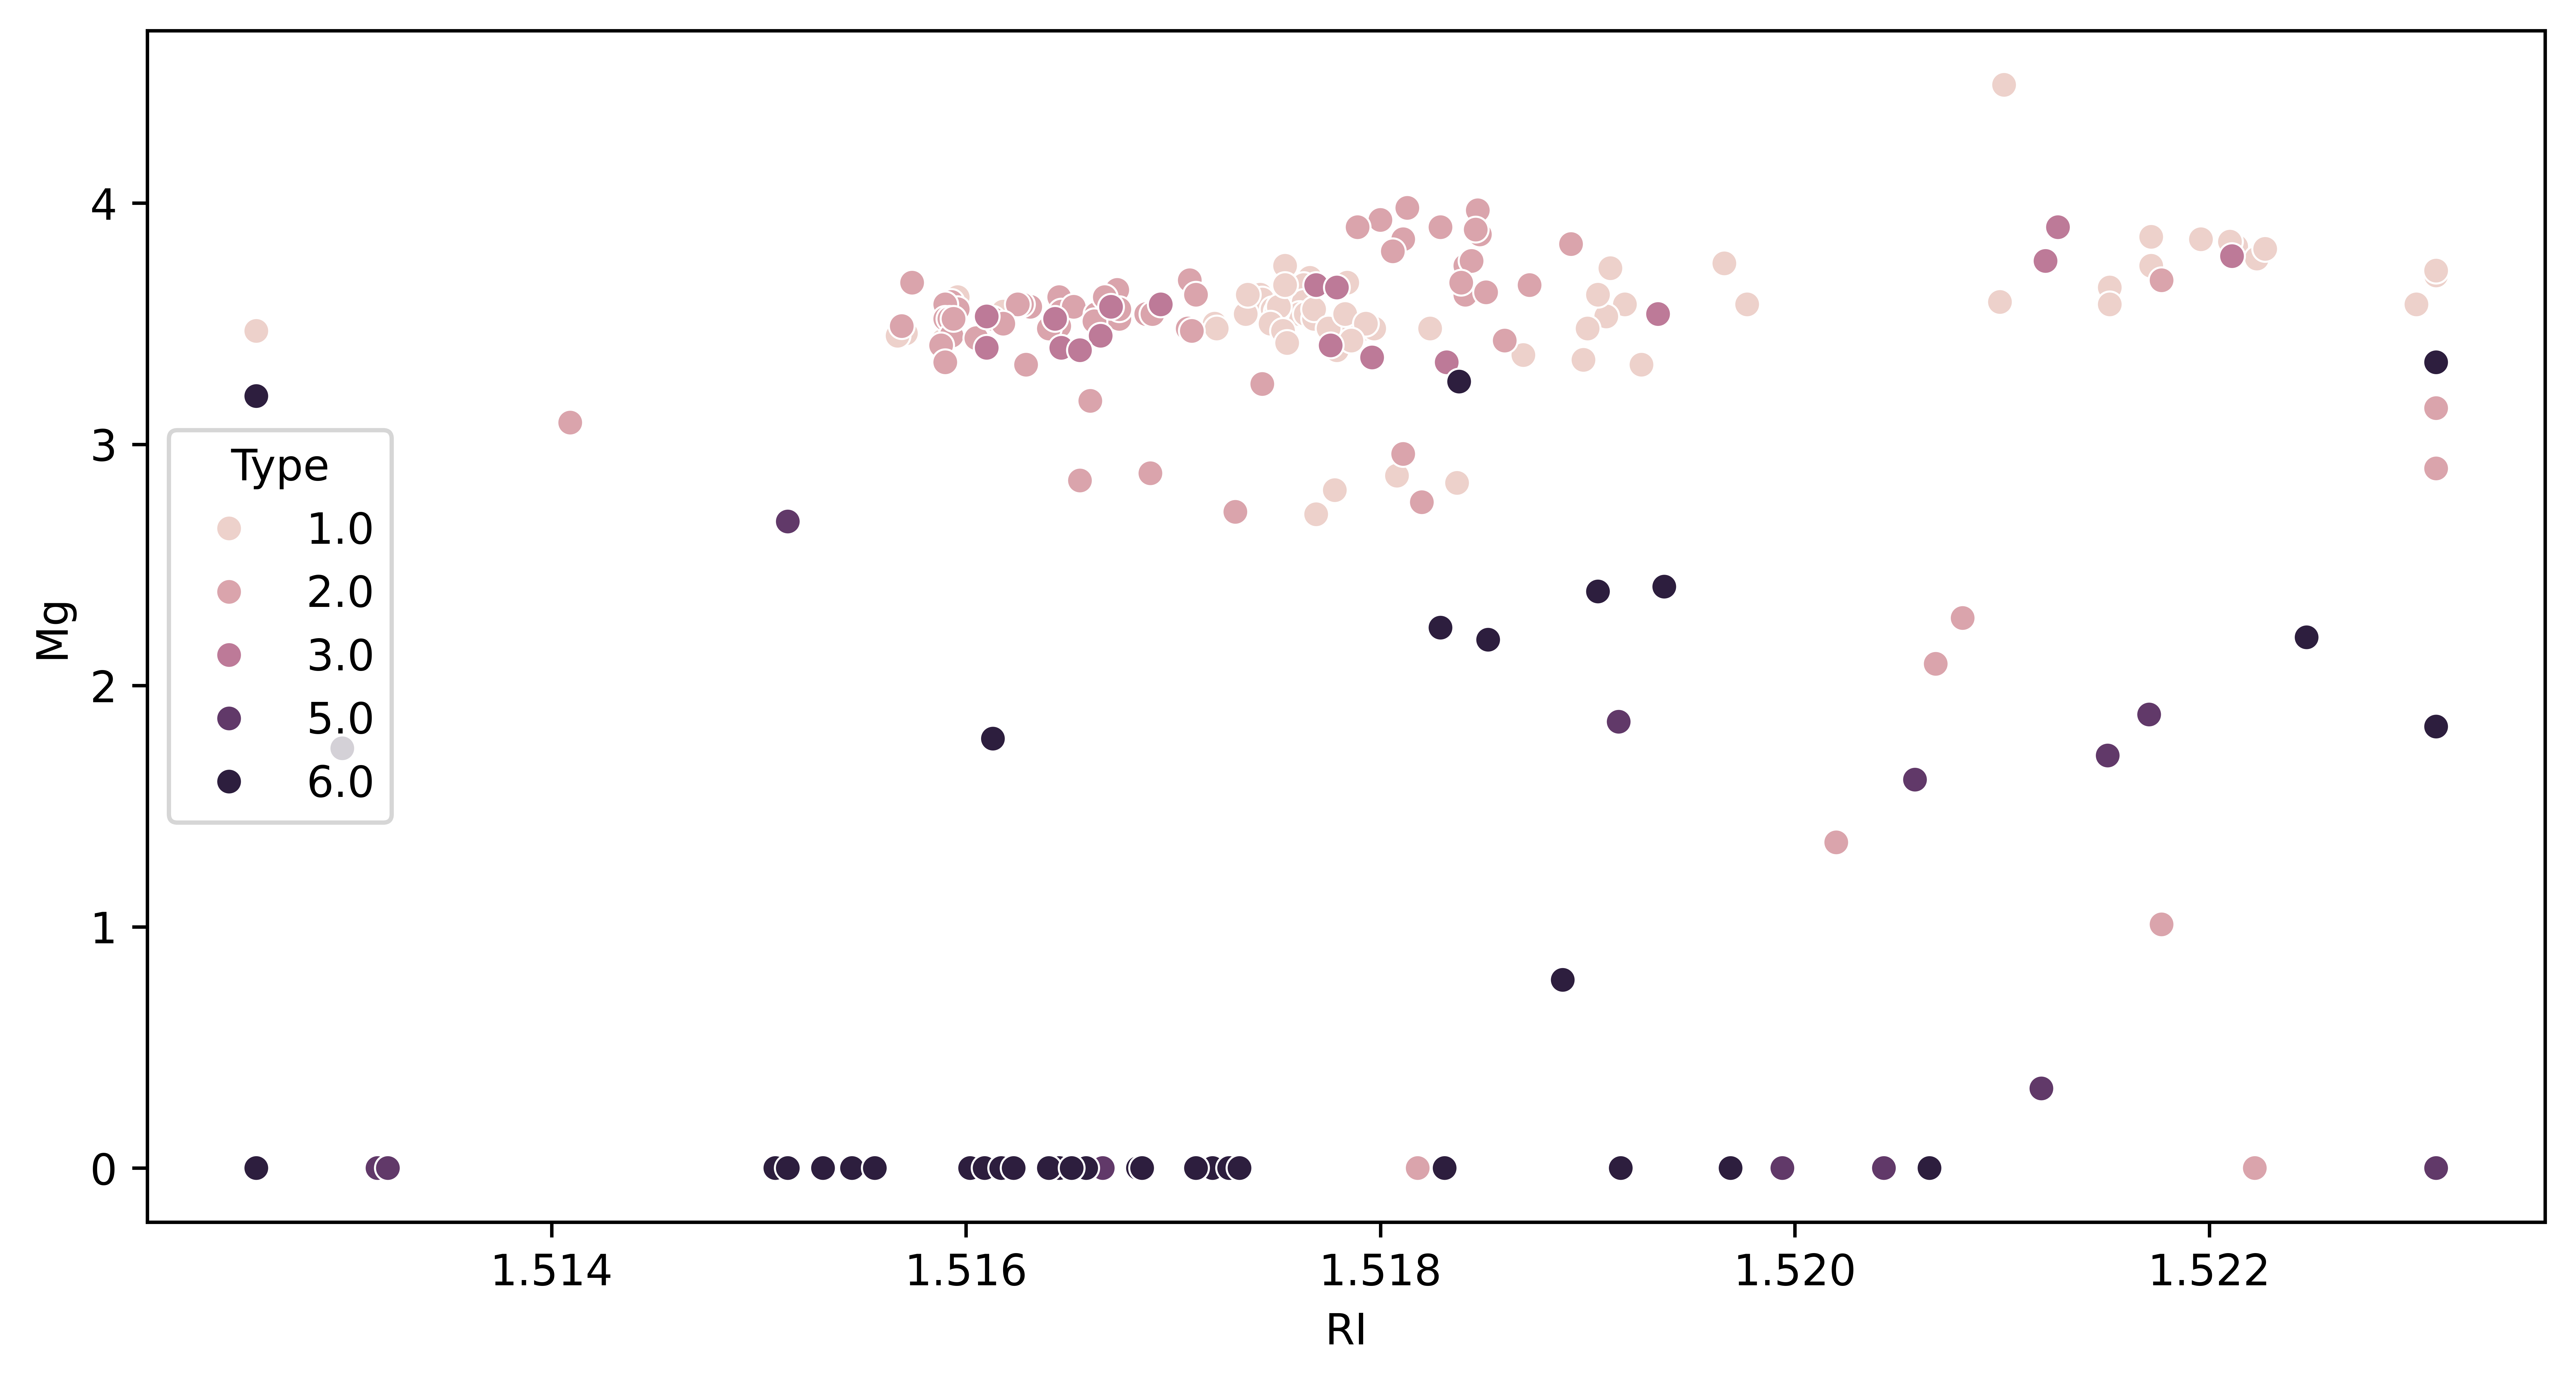

In [28]:
sns.scatterplot(x = df['RI'],y = df['Mg'], hue = df['Type'])

<Axes: xlabel='Na', ylabel='Si'>

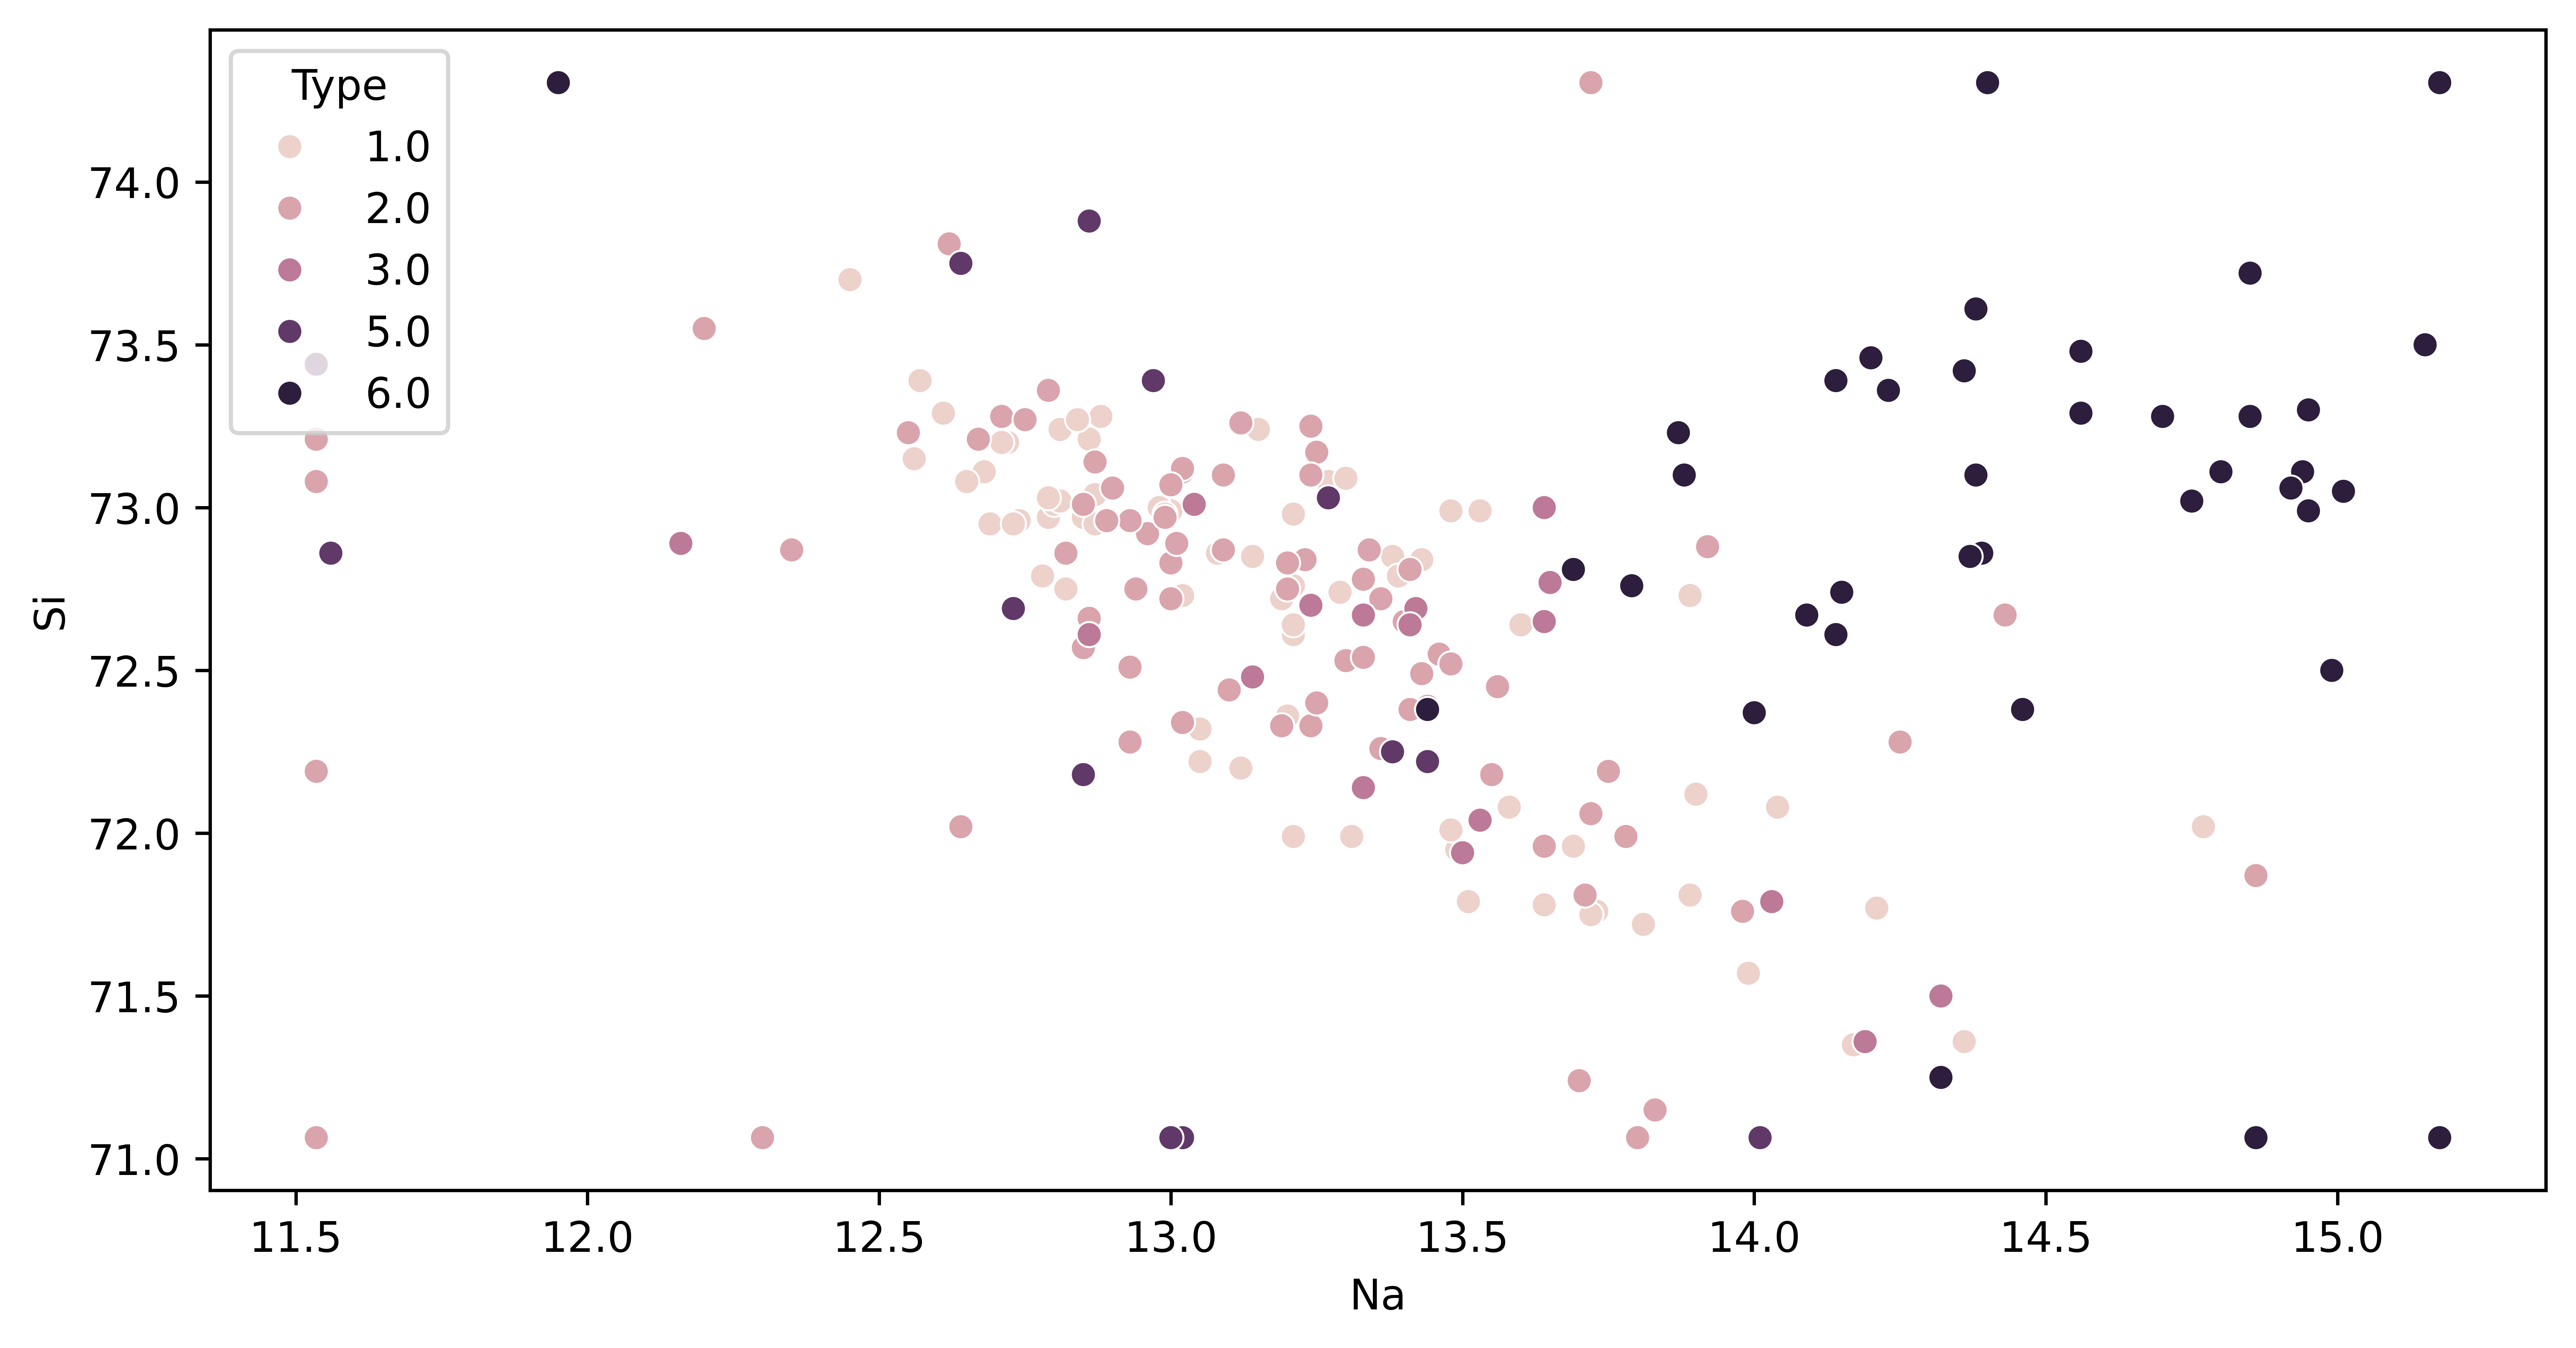

In [29]:
sns.scatterplot(x = df['Na'],y = df['Si'], hue = df['Type'])

<Axes: xlabel='Al', ylabel='K'>

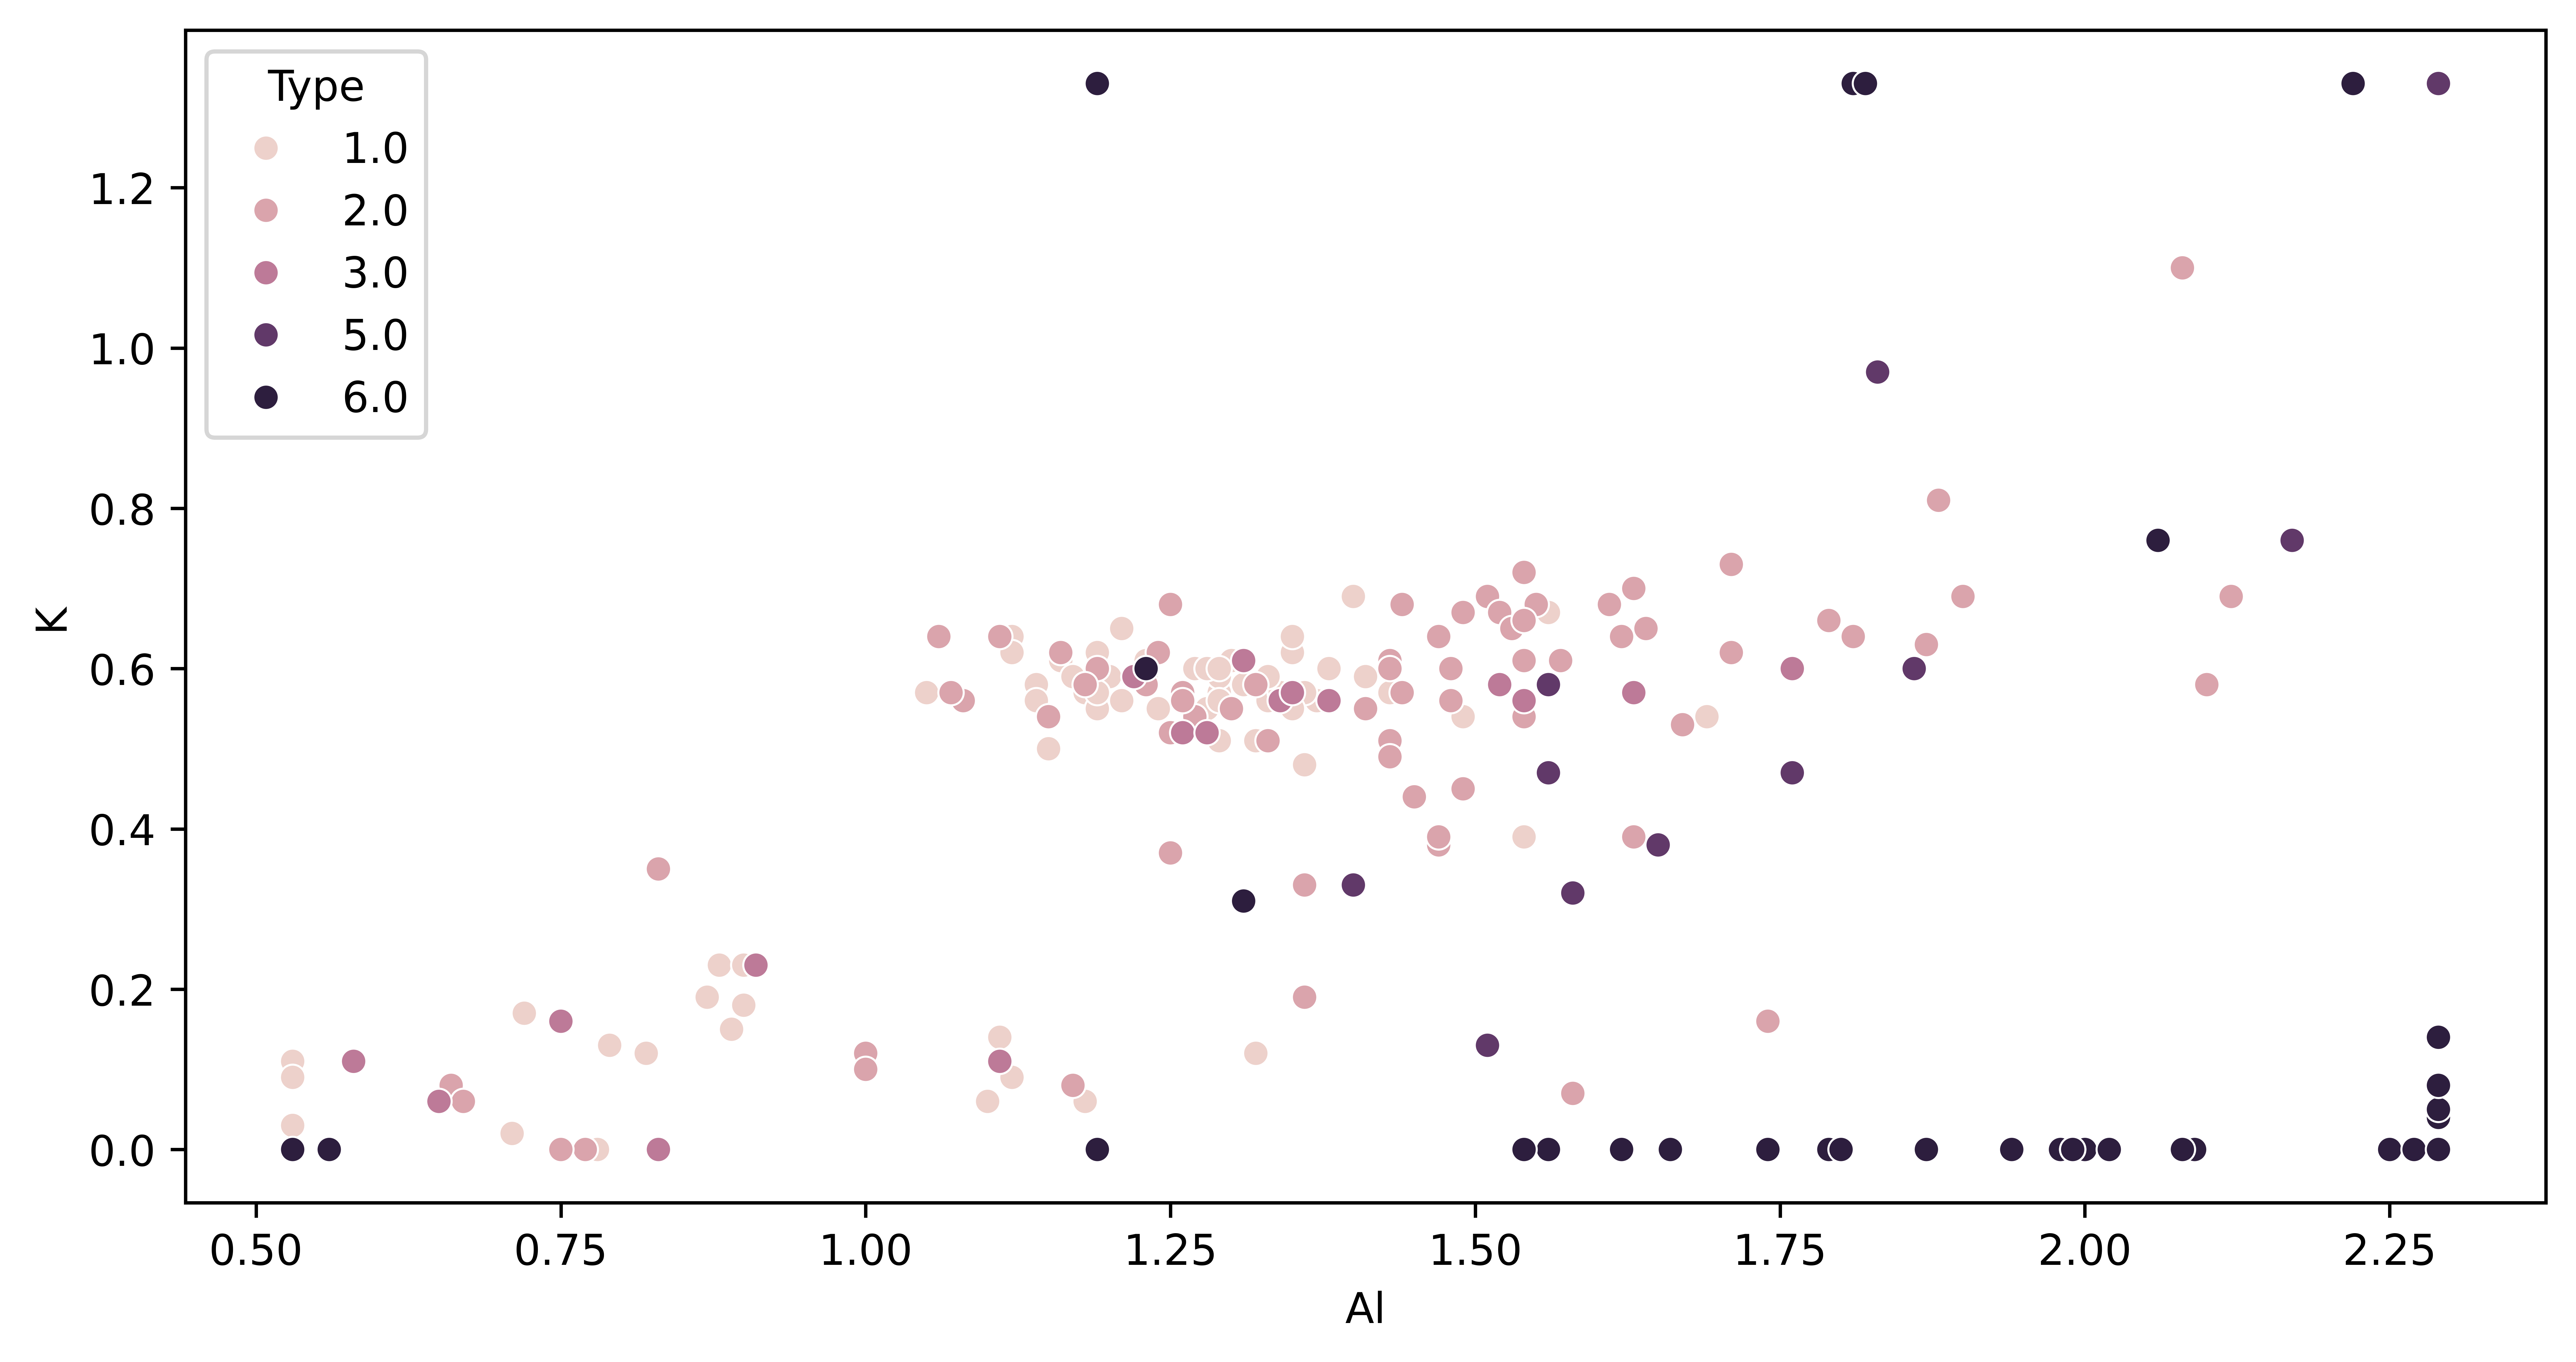

In [30]:
sns.scatterplot(x = df['Al'],y = df['K'], hue = df['Type'])

<Axes: xlabel='Ba', ylabel='Fe'>

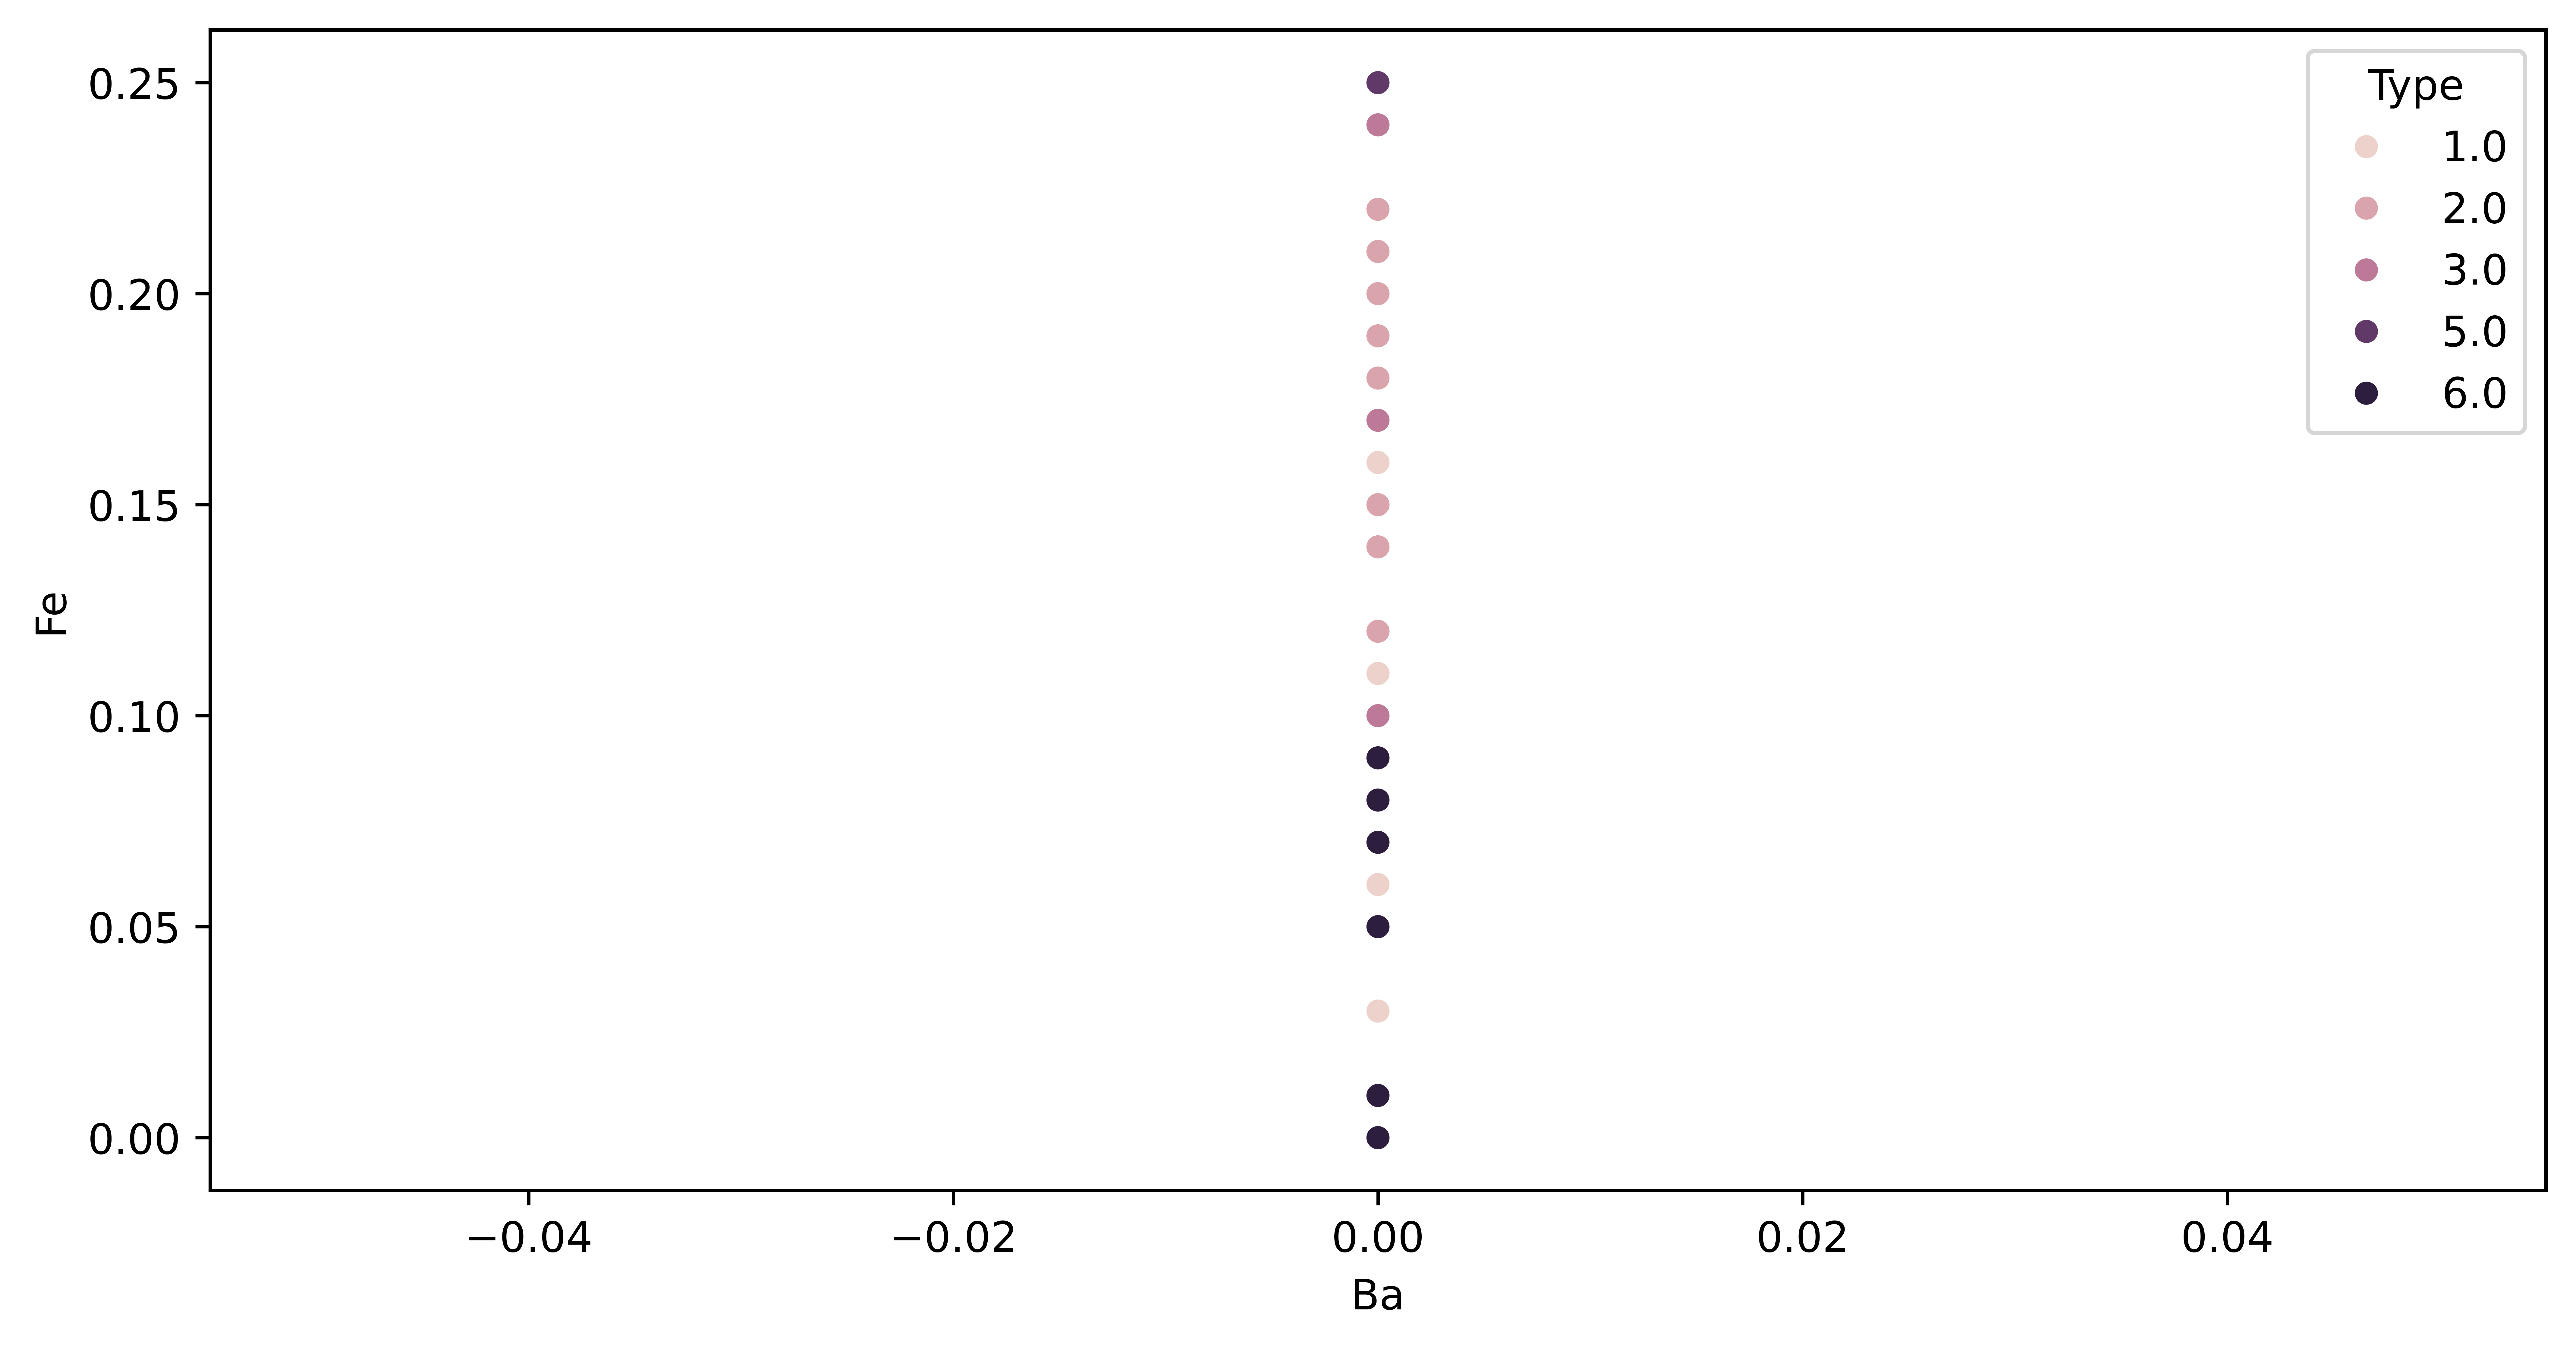

In [31]:
sns.scatterplot(x = df['Ba'],y = df['Fe'], hue = df['Type'])

In [32]:
df['Ba'].unique()

array([0.])

As we can see feature 'Ba' is having only one value '0.00' in it, we can remove that feature, as it is anyway not going to affect the results.

In [33]:
df.drop(columns = ['Ba'], inplace = True)

In [34]:
df

RI     Na    Mg    Al     Si     K    Ca   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0   1.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0   1.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0   1.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0   1.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0   1.0
..       ...    ...   ...   ...    ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.29  72.61  0.08  9.18  0.0   6.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  0.0   6.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  0.0   6.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  0.0   6.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  0.0   6.0

[213 rows x 9 columns]

<Axes: xlabel='Ca', ylabel='Fe'>

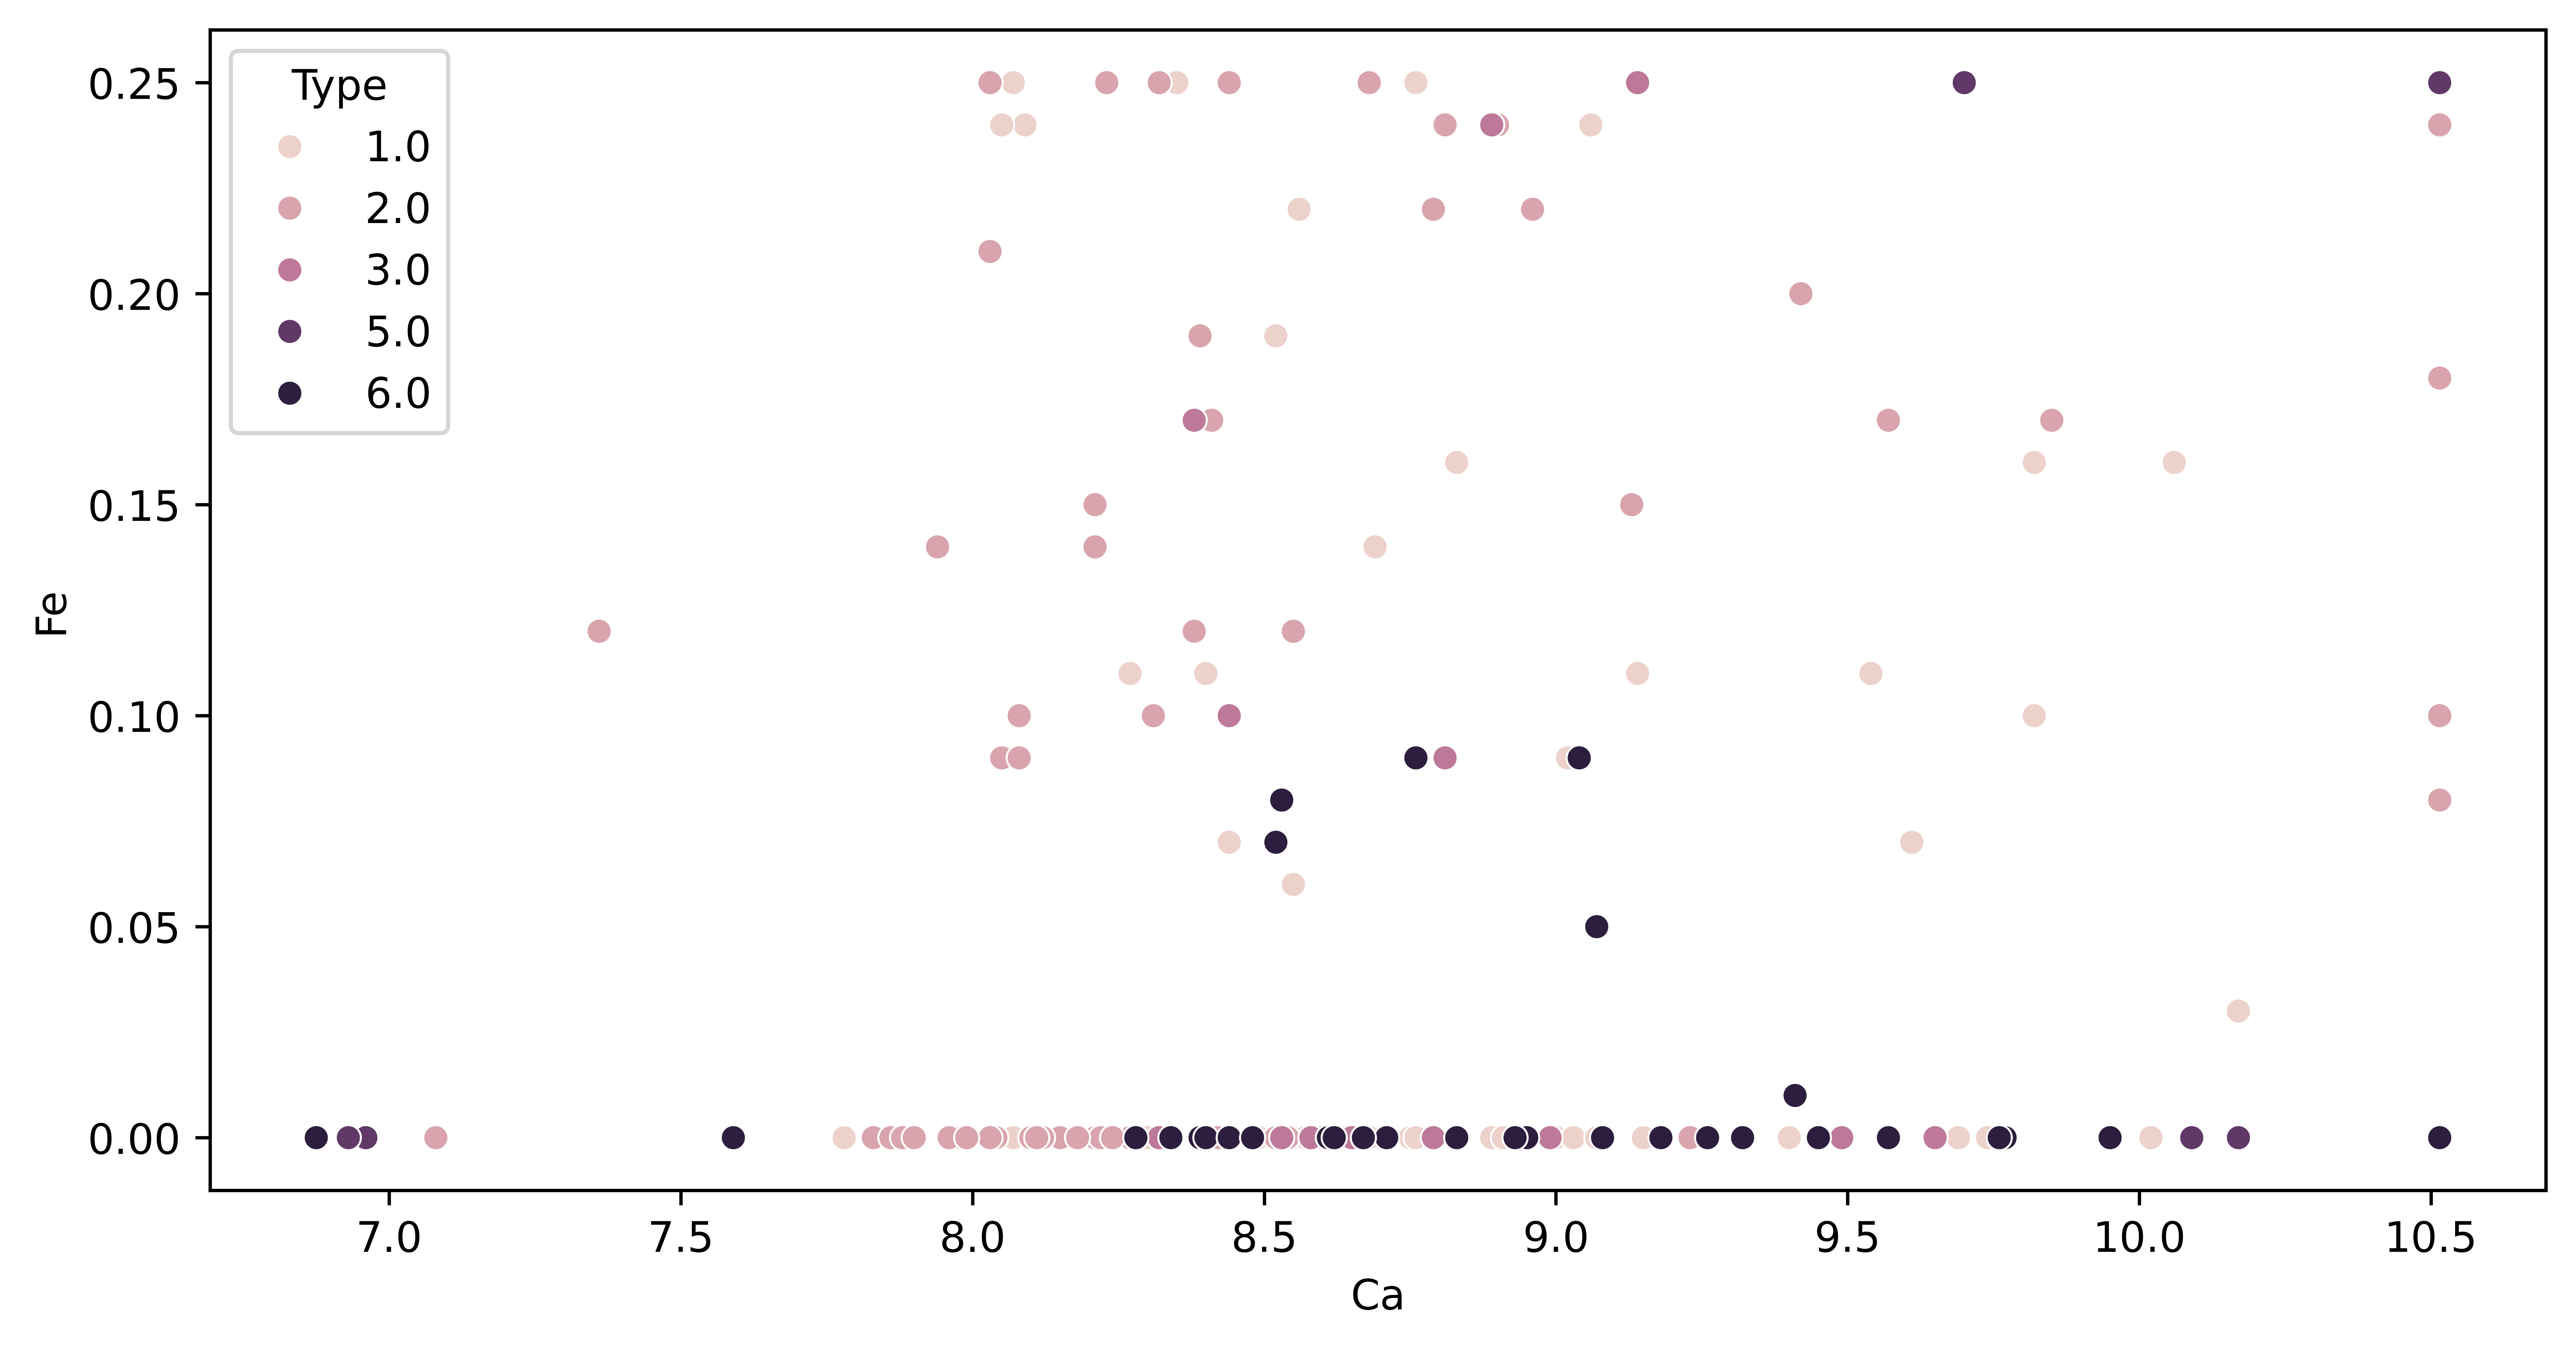

In [35]:
sns.scatterplot(x = df['Ca'],y = df['Fe'], hue = df['Type'])

We can see as its an multi-dimensional data, we can't properly visualize it in a 2d scatterplot.

In [36]:
df.corr()

RI        Na        Mg        Al        Si         K        Ca  \
RI    1.000000 -0.072901 -0.038895 -0.461848 -0.526911 -0.339382  0.760626   
Na   -0.072901  1.000000 -0.300589  0.223172 -0.158794 -0.492717 -0.103610   
Mg   -0.038895 -0.300589  1.000000 -0.472330 -0.206544  0.334363 -0.372089   
Al   -0.461848  0.223172 -0.472330  1.000000  0.130631  0.173969 -0.277706   
Si   -0.526911 -0.158794 -0.206544  0.130631  1.000000 -0.040748 -0.188686   
K    -0.339382 -0.492717  0.334363  0.173969 -0.040748  1.000000 -0.497856   
Ca    0.760626 -0.103610 -0.372089 -0.277706 -0.188686 -0.497856  1.000000   
Fe    0.100217 -0.249138  0.104381 -0.096567 -0.068593  0.076522  0.106853   
Type -0.155095  0.503702 -0.739870  0.585616  0.166276 -0.243427  0.073455   

            Fe      Type  
RI    0.100217 -0.155095  
Na   -0.249138  0.503702  
Mg    0.104381 -0.739870  
Al   -0.096567  0.585616  
Si   -0.068593  0.166276  
K     0.076522 -0.243427  
Ca    0.106853  0.073455  
Fe    1.000000 -0.219217  
Type -0.219217  1.000000

<Axes: >

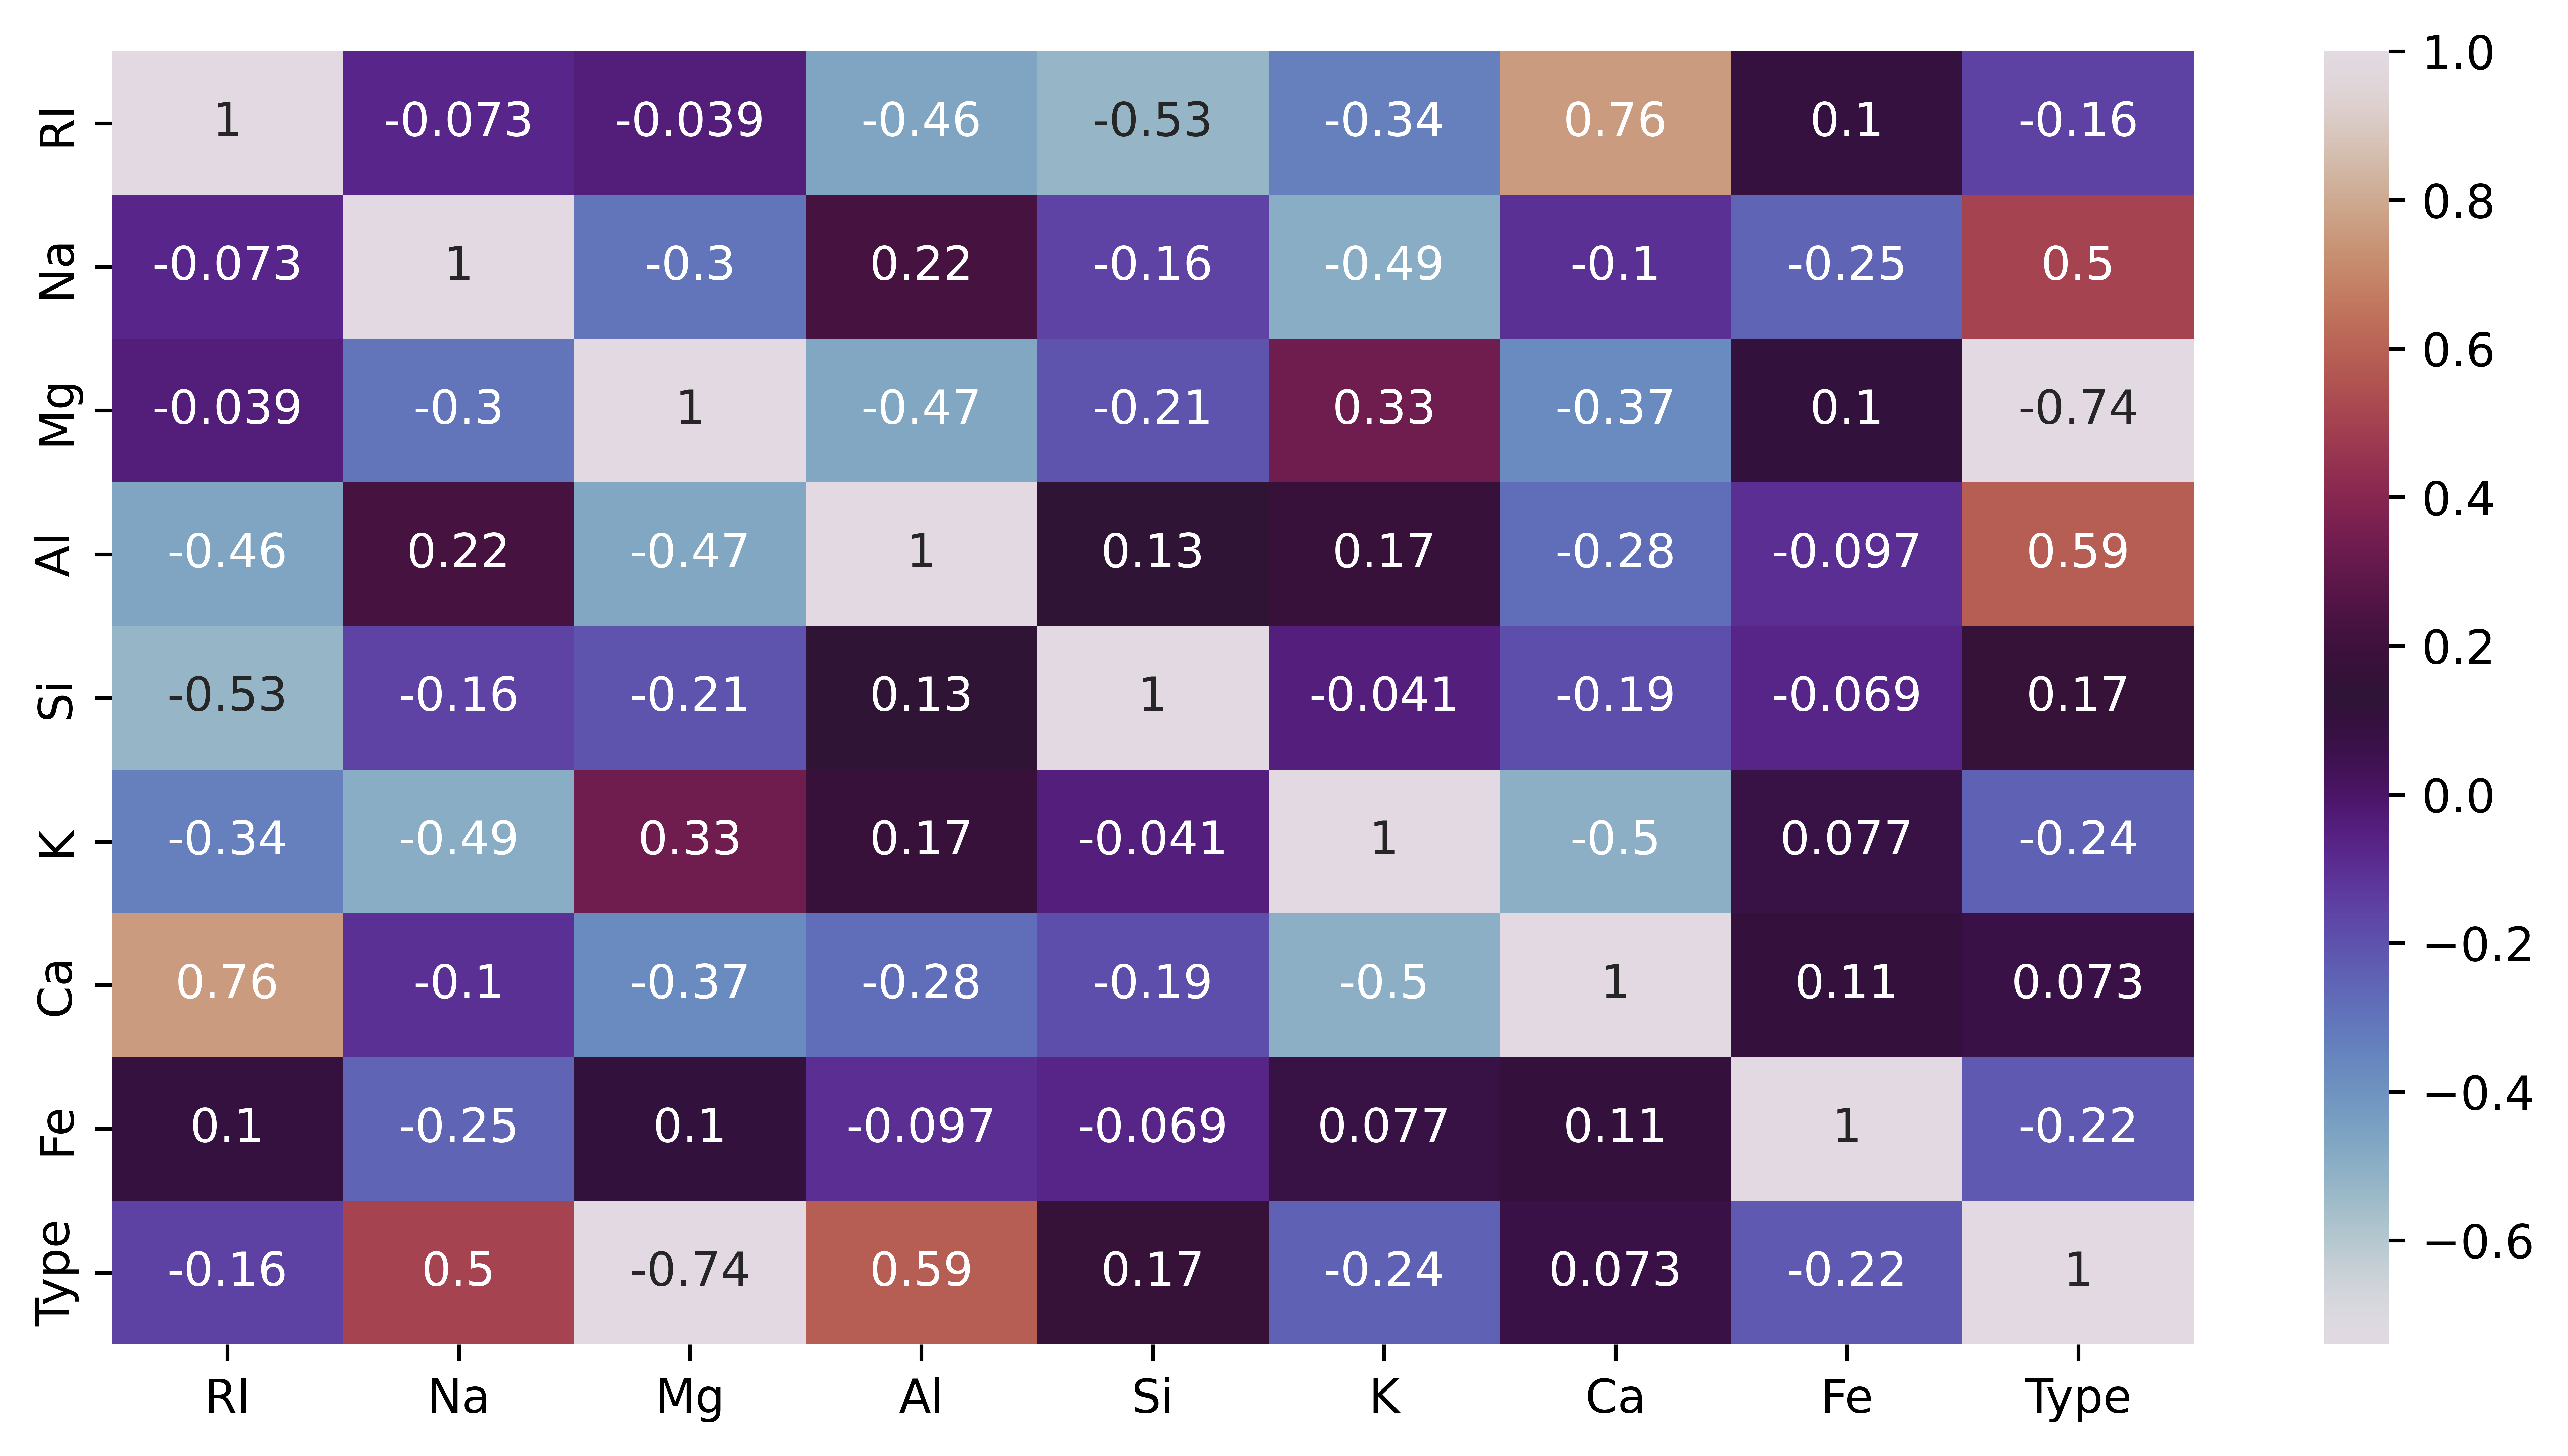

In [37]:
sns.heatmap(df.corr(),annot=True,cmap='twilight')

Scaling

In [42]:
x = df.iloc[:, :-1]
x

RI     Na    Mg    Al     Si     K    Ca   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0
..       ...    ...   ...   ...    ...   ...   ...  ...
209  1.51623  14.14  0.00  2.29  72.61  0.08  9.18  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  0.0

[213 rows x 8 columns]

In [43]:
y = df['Type']
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
209    6.0
210    6.0
211    6.0
212    6.0
213    6.0
Name: Type, Length: 213, dtype: float64

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()

In [44]:
x = sc.fit_transform(x)
x

array([[ 1.21609303,  0.3226798 ,  1.25723832, ..., -1.25353611,
        -0.04441938, -0.62110164],
       [-0.22720718,  0.6605561 ,  0.63931074, ...,  0.12479895,
        -1.11573287, -0.62110164],
       [-0.83424227,  0.17401423,  0.6045957 , ..., -0.17055856,
        -1.17395642, -0.62110164],
       ...,
       [ 1.06327301,  1.29576355, -1.86017161, ..., -1.45044112,
        -0.40540545, -0.62110164],
       [-0.69415725,  1.32279365, -1.86017161, ..., -1.45044112,
        -0.3588266 , -0.62110164],
       [-0.43945721,  1.12006787, -1.86017161, ..., -1.45044112,
        -0.19580063, -0.62110164]])

In [47]:
scaled_data = pd.DataFrame(x, columns=df.drop(columns = ['Type']).columns)
scaled_data

RI        Na        Mg        Al        Si         K        Ca  \
0    1.216093  0.322680  1.257238 -0.773927 -1.361078 -1.253536 -0.044419   
1   -0.227207  0.660556  0.639311 -0.154741  0.086641  0.124799 -1.115733   
2   -0.834242  0.174014  0.604596  0.273927  0.482859 -0.170559 -1.173956   
3   -0.205982 -0.258467  0.701798 -0.321445 -0.096228  0.420156 -0.661589   
4   -0.307862 -0.177377  0.653197 -0.440519  0.620012  0.354521 -0.836260   
..        ...       ...       ...       ...       ...       ...       ...   
208 -0.813017  0.998432 -1.860172  2.060042 -0.096228 -1.187901  0.456303   
209 -0.549827  2.052606 -1.860172  1.345596  0.589533 -1.450441 -0.451984   
210  1.063273  1.295764 -1.860172  1.417041  1.138143 -1.450441 -0.405405   
211 -0.694157  1.322794 -1.860172  1.226522  1.427687 -1.450441 -0.358827   
212 -0.439457  1.120068 -1.860172  1.559930  1.046708 -1.450441 -0.195801   

           Fe  
0   -0.621102  
1   -0.621102  
2   -0.621102  
3   -0.621102  
4   -0.621102  
..        ...  
208 -0.621102  
209 -0.621102  
210 -0.621102  
211 -0.621102  
212 -0.621102  

[213 rows x 8 columns]

Now, our data is ready to build the model.

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [52]:
xtrain

array([[-0.94461229, -0.73149426,  0.58376668, ...,  0.81396648,
        -0.9527069 , -0.62110164],
       [ 1.6830431 ,  1.06600766,  0.76428485, ..., -0.69563859,
         0.40972438,  2.30318328],
       [ 2.10117566, -2.52223866, -1.86017161, ..., -1.45044112,
         2.01087225, -0.62110164],
       ...,
       [-0.95310229, -0.21792228,  0.45879257, ..., -0.17055856,
        -0.66158911, -0.62110164],
       [-2.18839747,  1.34982376, -0.65208848, ..., -1.45044112,
        -1.39520595, -0.62110164],
       [ 2.10117566,  0.53892063,  0.32687544, ..., -1.18790111,
         2.01087225, -0.62110164]])

In [53]:
ytrain

80     2.0
162    3.0
110    2.0
128    2.0
96     2.0
      ... 
107    2.0
14     1.0
93     2.0
180    6.0
103    2.0
Name: Type, Length: 170, dtype: float64

In [54]:
xtest

array([[-2.52677185e-01, -5.42283533e-01,  6.39310737e-01,
        -1.54740767e-01,  4.82859410e-01,  4.20156462e-01,
        -4.51984294e-01,  6.65583724e-01],
       [-1.20355733e+00,  1.32279365e+00, -1.86017161e+00,
         2.06004236e+00,  6.50490110e-01, -1.31917111e+00,
         3.39856107e-01, -6.21101643e-01],
       [ 1.43258806e+00, -4.74708272e-01,  6.74025770e-01,
        -1.32166951e+00, -5.38163947e-01, -8.26908591e-01,
         1.23649891e+00,  1.36741211e+00],
       [-8.13017268e-01,  1.07952271e+00, -1.86017161e+00,
         2.06004236e+00,  1.19909967e+00, -1.31917111e+00,
         2.93277260e-01,  4.31640930e-01],
       [-6.00767237e-01, -1.36831971e-01,  6.67082763e-01,
         2.50112063e-01, -2.18141701e-01,  6.82696473e-01,
        -8.82838630e-01,  2.30318328e+00],
       [ 2.10117566e+00, -1.02882541e+00, -1.86017161e+00,
        -1.79796696e+00, -9.95338584e-01, -1.25353611e+00,
         2.01087225e+00, -6.21101643e-01],
       [-2.27207181e-01, -7.990695

In [55]:
ytest

9      1.0
198    6.0
67     1.0
192    6.0
118    2.0
112    2.0
15     1.0
87     2.0
76     2.0
145    2.0
183    6.0
171    5.0
142    2.0
74     2.0
179    6.0
168    5.0
191    6.0
18     1.0
46     1.0
185    6.0
99     2.0
209    6.0
211    6.0
196    6.0
149    3.0
105    2.0
30     1.0
25     1.0
176    6.0
16     1.0
56     1.0
139    2.0
159    3.0
94     2.0
70     2.0
203    6.0
172    5.0
153    3.0
98     2.0
85     2.0
102    2.0
201    6.0
61     1.0
Name: Type, dtype: float64

In [56]:
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(xtrain, ytrain)
ypred = rfc.predict(xtest)
ypred

array([1., 6., 1., 6., 2., 2., 1., 2., 2., 2., 2., 5., 2., 2., 6., 5., 6.,
       1., 1., 2., 1., 6., 6., 6., 2., 2., 1., 1., 6., 1., 1., 2., 3., 2.,
       2., 6., 5., 3., 2., 2., 1., 2., 1.])

In [57]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         1.0       0.83      1.00      0.91        10
         2.0       0.76      0.87      0.81        15
         3.0       1.00      0.67      0.80         3
         5.0       1.00      1.00      1.00         3
         6.0       1.00      0.75      0.86        12

    accuracy                           0.86        43
   macro avg       0.92      0.86      0.88        43
weighted avg       0.88      0.86      0.86        43



In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, ypred)

array([[10,  0,  0,  0,  0],
       [ 2, 13,  0,  0,  0],
       [ 0,  1,  2,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 0,  3,  0,  0,  9]], dtype=int64)

In [59]:
rfc.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=656463688),
 DecisionTreeClassifier(max_features='sqrt', random_state=1401472942),
 DecisionTreeClassifier(max_features='sqrt', random_state=649142968),
 DecisionTreeClassifier(max_features='sqrt', random_state=390924044),
 DecisionTreeClassifier(max_features='sqrt', random_state=1518419210),
 DecisionTreeClassifier(max_features='sqrt', random_state=83865303),
 DecisionTreeClassifier(max_features='sqrt', random_state=1306720941),
 DecisionTreeClassifier(max_features='sqrt', random_state=1179060029),
 DecisionTreeClassifier(max_features='sqrt', random_state=743030850),
 DecisionTreeClassifier(max_features='sqrt', random_state=1493507716),
 DecisionTreeClassifier(max_features='sqrt', random_state=598741614),
 DecisionTreeClassifier(max_features='sqrt', random_state=852787840),
 DecisionTreeClassifier(max_features='sqrt', random_state=1223302591),
 DecisionTreeClassifier(max_features='sqrt', random_state=1882623251),
 DecisionTreeC

In [60]:
len(rfc.estimators_)

50

In [61]:
rfc.estimators_[45]

DecisionTreeClassifier(max_features='sqrt', random_state=1799178147)

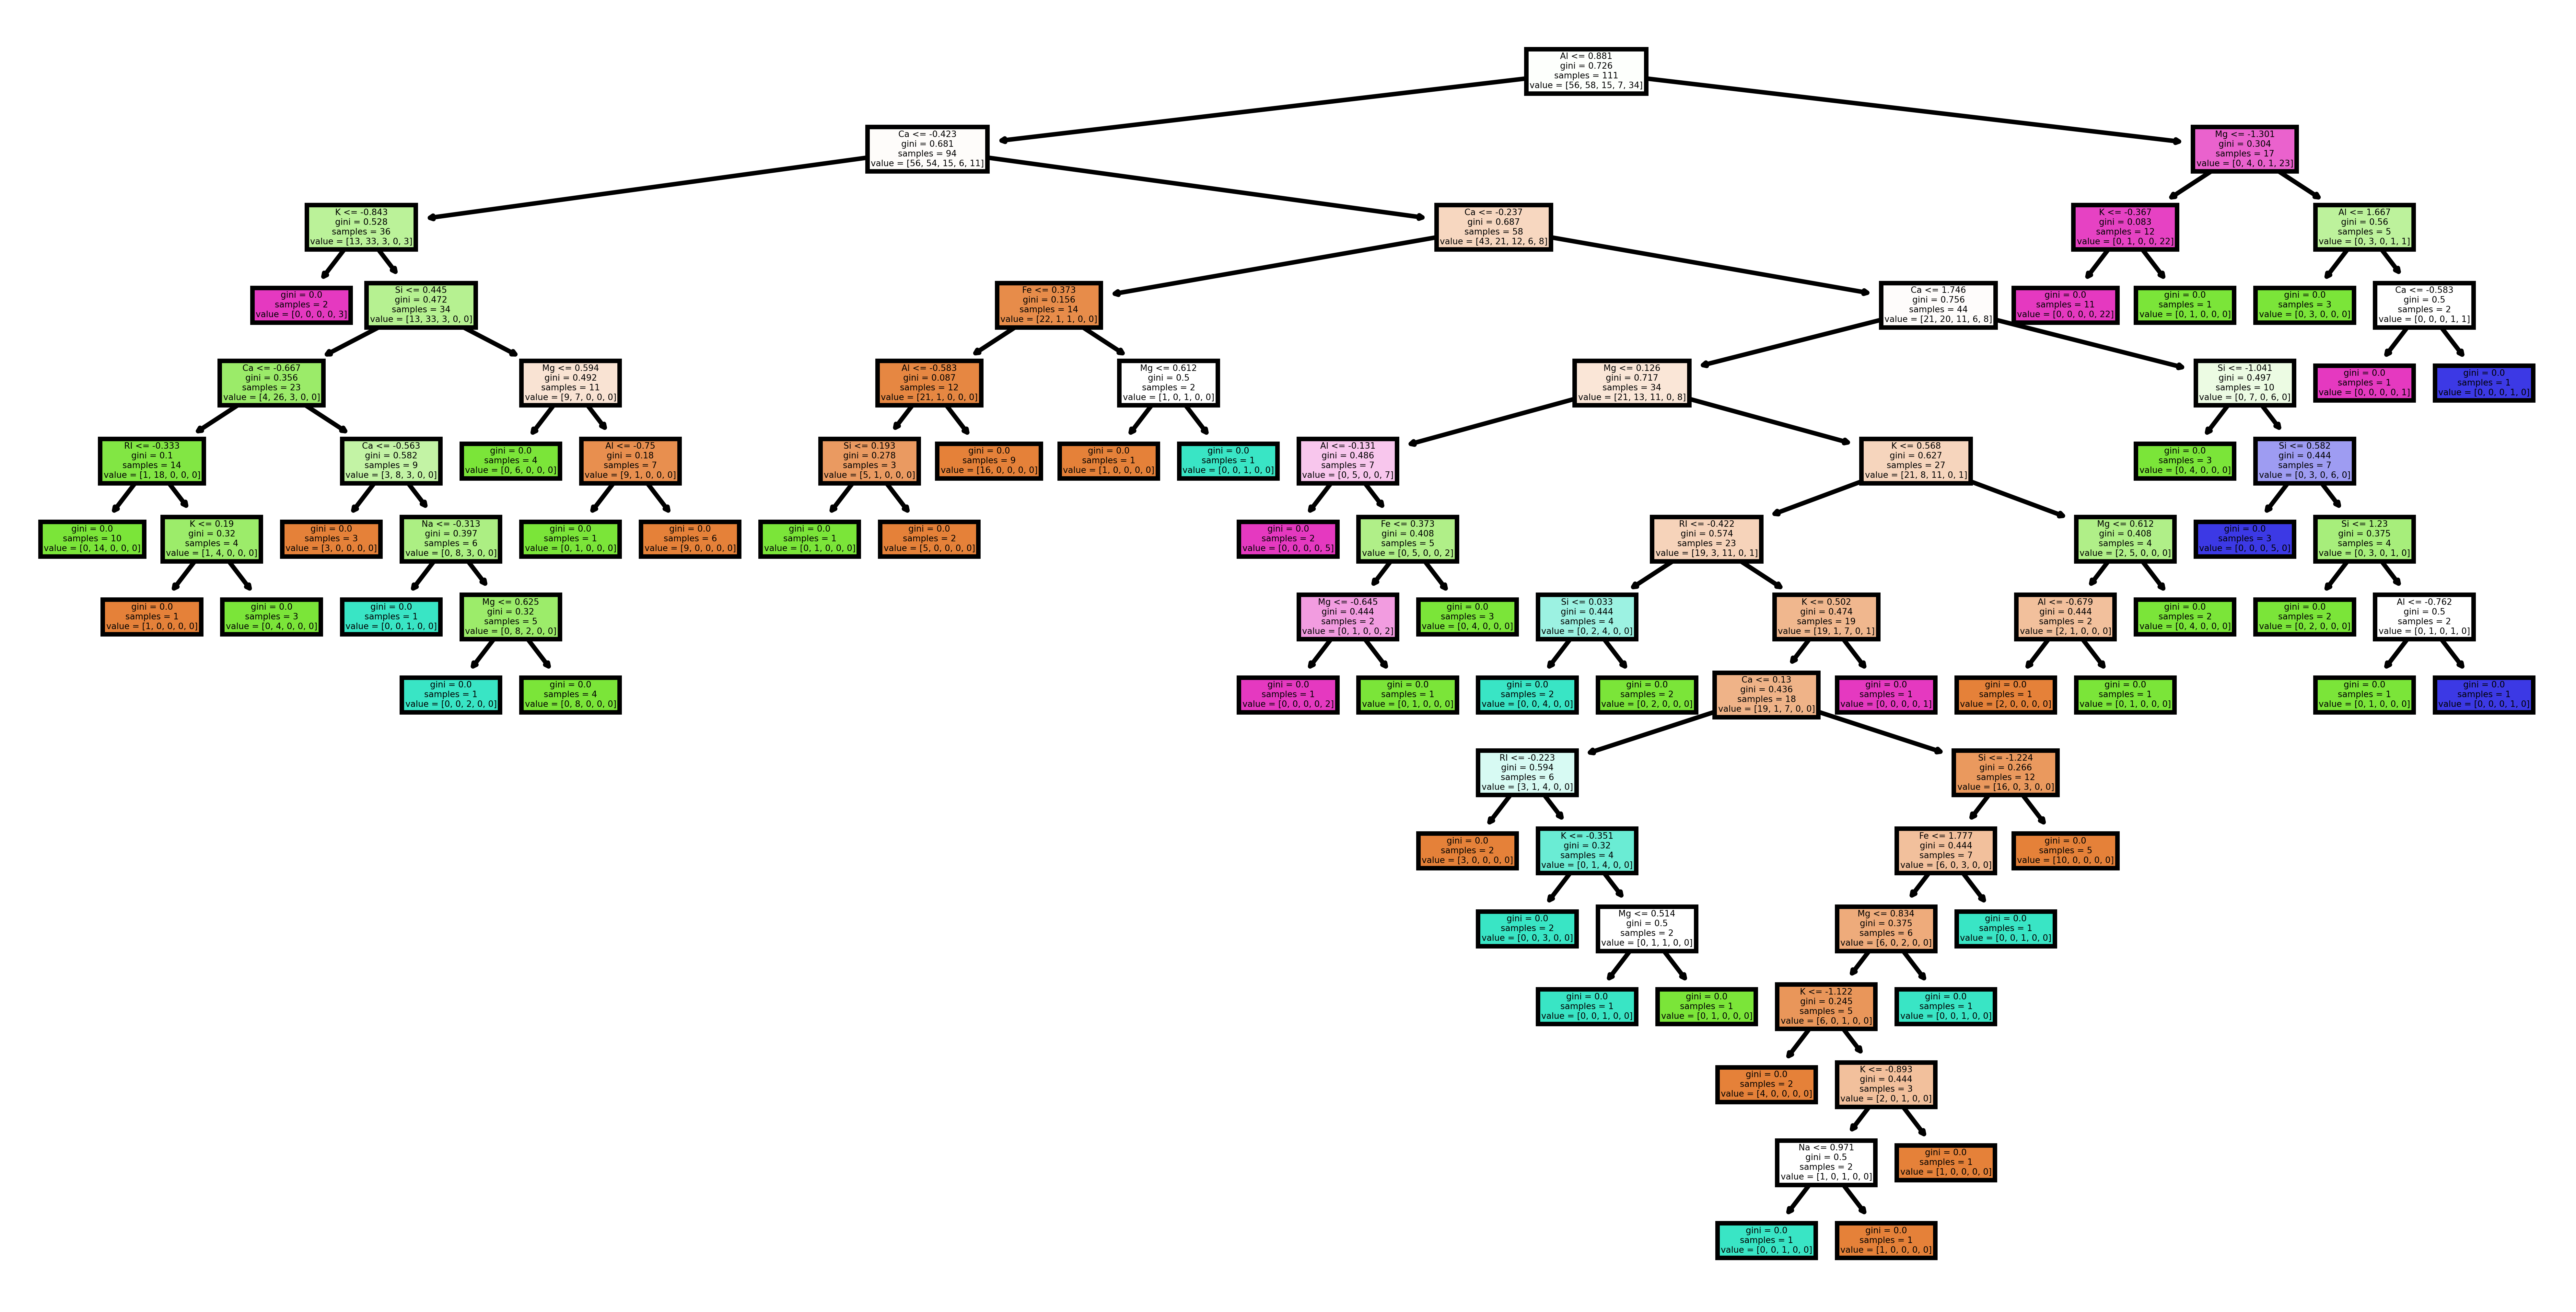

In [62]:
tree.plot_tree(rfc.estimators_[45], feature_names = scaled_data.columns, filled = True)
plt.show() 

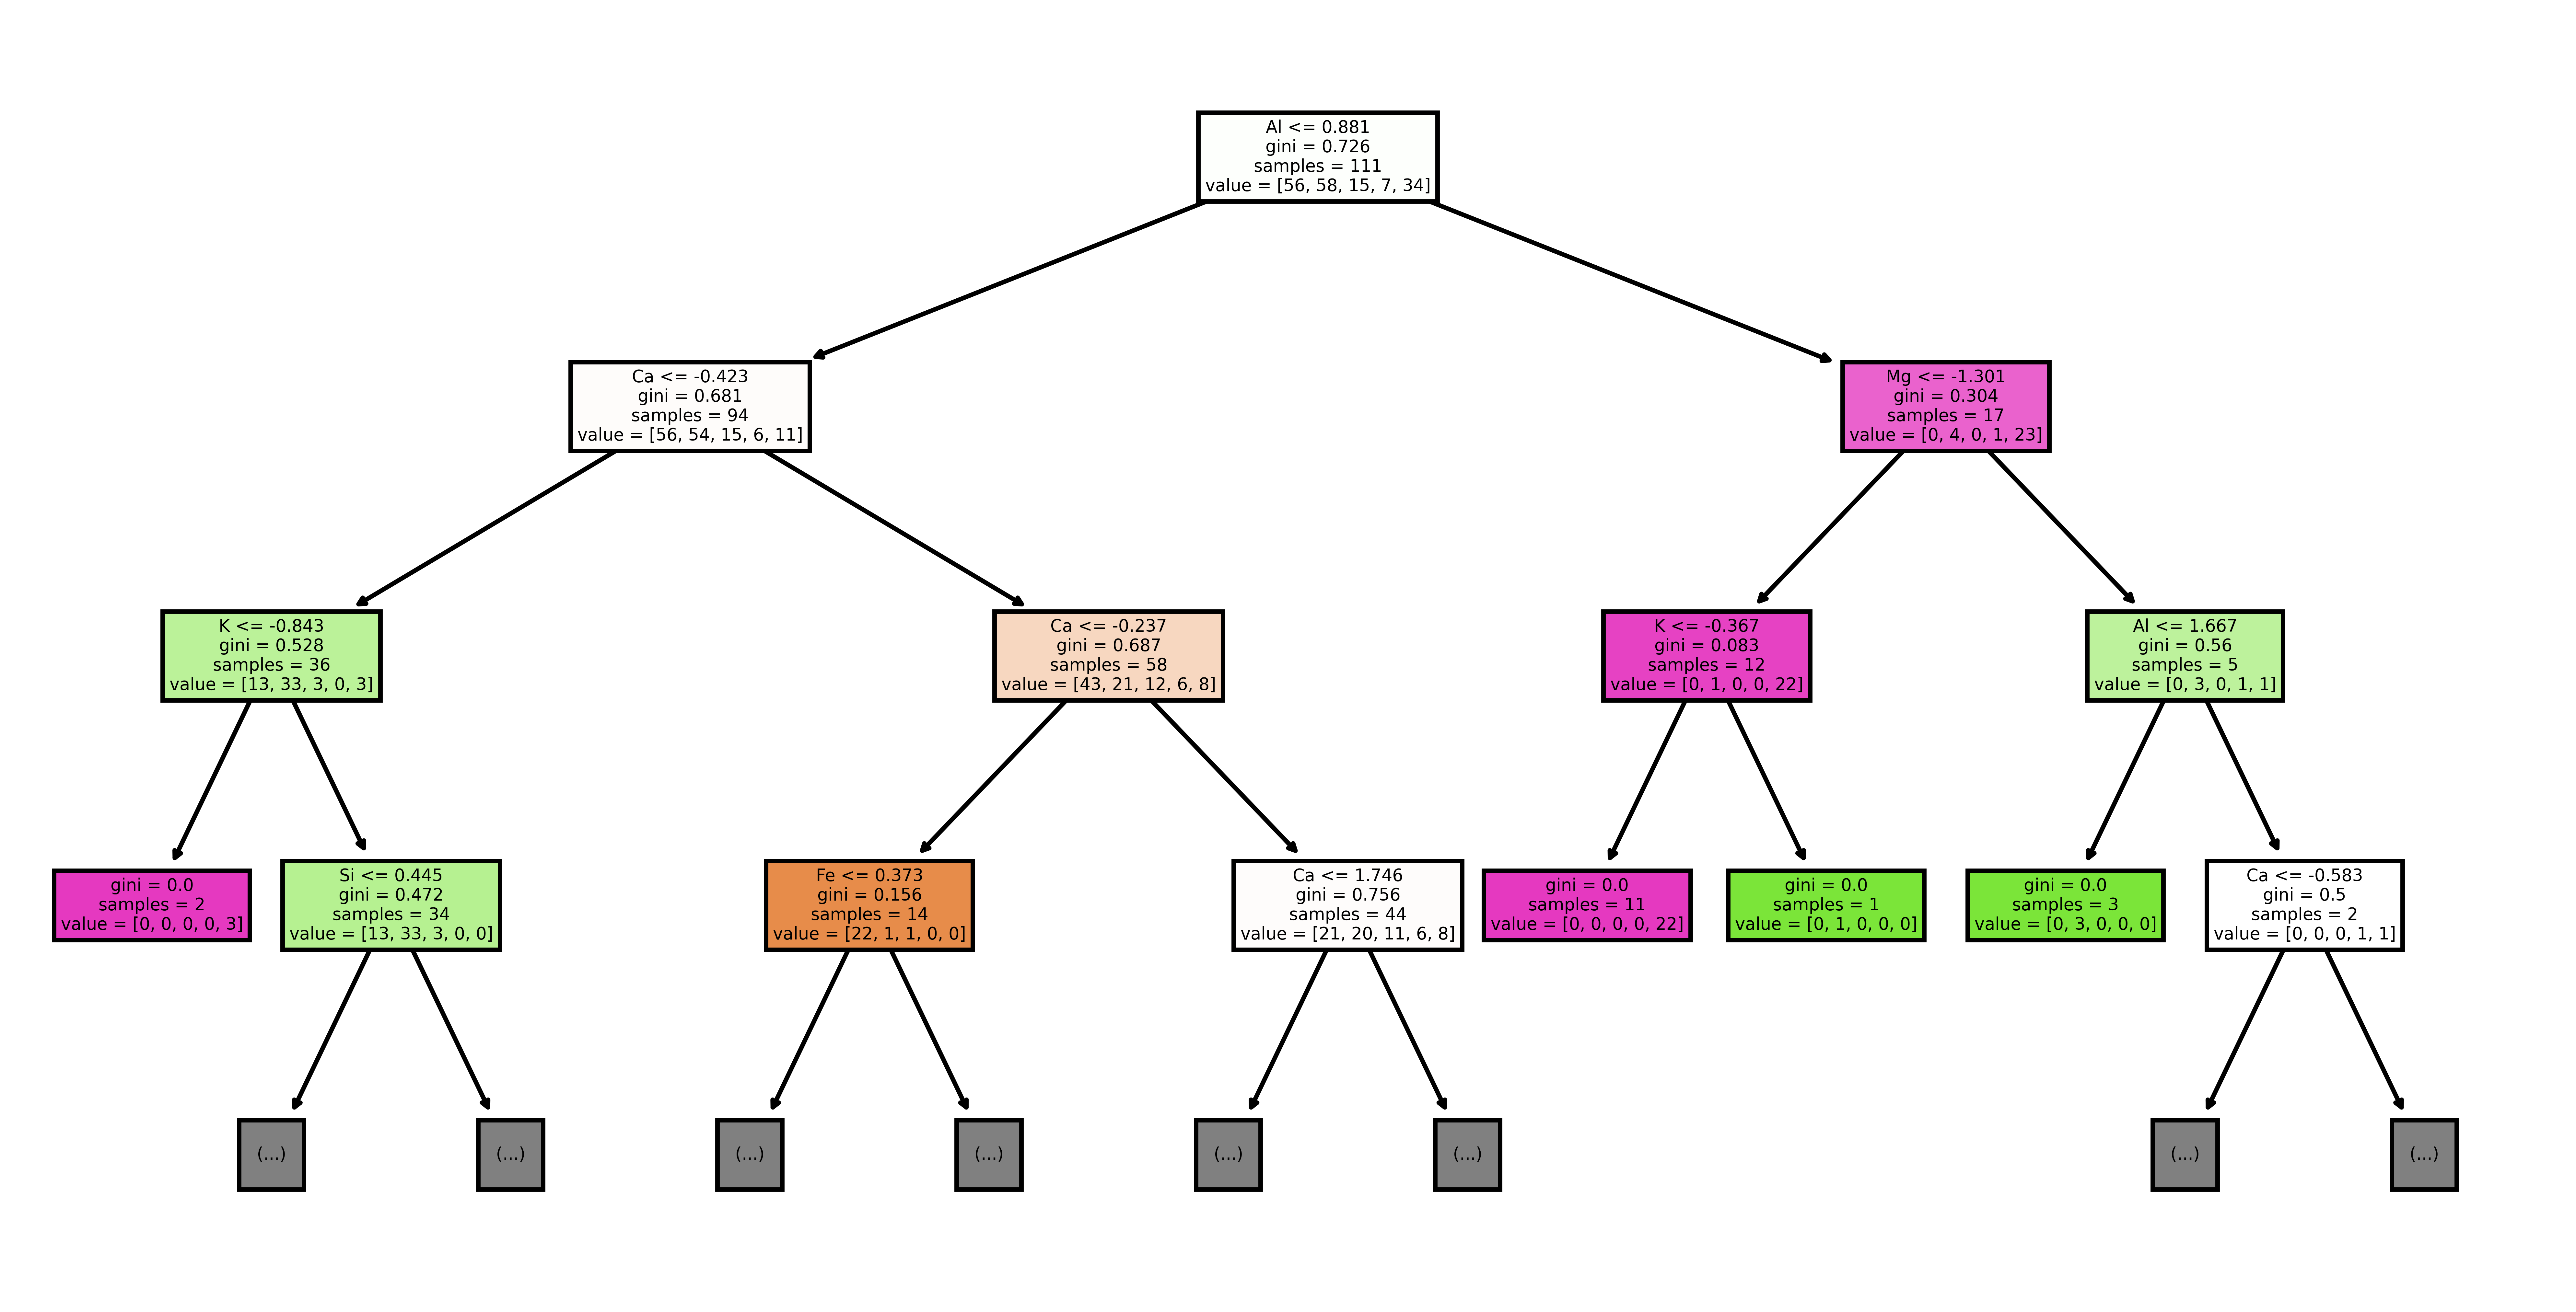

In [63]:
tree.plot_tree(rfc.estimators_[45], feature_names = scaled_data.columns, filled = True, max_depth = 3)
plt.show()

Interview Questions

1. Explain Bagging and Boosting methods. How is it different from each other.


-  Bagging : Bagging is a learning approach that aids in enhancing the performance, execution, and precision of machine learning algorithms.
-  Boosting : Boosting is an approach that iteratively modifies the weight of observation based on the last classification.
-  In bagging, models are trained in parallel using bootstrap samples from the training dataset. In boosting, models are trained sequentially, with each model building on the previous model's errors.

2. Explain how to handle imbalance in the data.

-  Resampling: A widely used technique that involves removing samples from the majority class and adding more examples from the minority class. This is also known as under-sampling and over-sampling, respectively. -  
SMOTE: A popular algorithm that over-samples negative class samples to handle imbalance. It uses the kNN algorithm to choose neighboring data points based on the degree of oversampling required
-  
Stratified k-fold cross validation: A technique that sorts data so that each fold has an equal proportion of target features. This ensures that each fold is representative of the data as a whol
-   
Weighted loss function: A technique that can be used to handle imbalanced da
-  . 
Algorithms robust to imbalanced data: Some algorithms are designed to be robust to imbalanced d
-  aa. 
Proper evaluation metric: Choosing the right evaluation metric is important for handling imbalanced 
-   ta. 
Ensemble different resampled datasets: Using more data is one of the easiest ways to generalize a model. 
